Graciela Montserrat Rodríguez Rodríguez
Proyecto, Modelos Computacionales I

Paper:An EEG Dataset of Neural 
Signatures in a Competitive 
two-Player Game Encouraging 
Deceptive Behavior

In [25]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sp
from scipy.io import loadmat
import mne
import glob
import os
import os
import mimodulo as mm 

# Descripción del DATA SET
### Sujetos
-24 participantes de entre 19 y 34 años sin historial de enfermedades neurologicas y con agudeza visual normal.
### Diseño
-El experimento consiste en la adquisición de datos de EEG de los participantes mientras juegan una juego de cartas en parejas, diseñado para acceder a conductas "engañosas", "confiables" y la estimulación de la decepción.
-Los ensayos estan divididos de la siguiente forma:
-Toma de decisión del jugador: En un total de segundos el jugador tenía que mirar a la carta mostrada en la pantalla del ordenador. Esta carta contenía un número y el jugador decidiría presionar el número real u otro número para engañar al observador.
Los colores de las cartas indicaban 3 tipos de ordenes:
  a)Instrucción de mostrar la carta real
  b)Instrucción de mostrar una carta falsa
  c)Respuesta espontánea
-Muestra de la respuesta: Mientras el jugador tomaba la decisión, el observador tuvo acceso a las expresiones faciales en directo. La respuesta podía ser dada en un período de 3 seg.
-Respuesta del observador: El observador tenía que decidir si la respuesta que el jugador decidió mostrar era real o engañosa en un período de 3 segundos.
-Después de la respuesta del observador, se mostraban los puntos del participante. 
Si el jugador mentía, el ganador recibiría 15 puntos y el perdedor perdería 5. Si el jugador mostraba la carta real, se le asignban 10 puntos al ganador y 5 puntos al perdedor.

### Instrumentación
-30 electrodos de registro filtrados a una frecuencia de 100HZ con un filtro de pasa alta/baja de 1/49hz.


### Características


In [26]:
#Abrir datos
ruta = r"C:\Datasets\Proyecto_Mon\Proyecto\Preprocessed\DecisionMaking\*.mat"
mat_files = {}

for archivo in glob.glob(ruta):
    nombre = os.path.basename(archivo)
    contenido = loadmat(archivo)
    mat_files[nombre] = contenido


In [27]:
#Codigo para analizar los archivos
if mat_files: 
    first_file_name = list(mat_files.keys())[0]
    data = mat_files[first_file_name] 

    print(f"\n--- Explorando '{first_file_name}' ---")
    print("Nivel 1 (contenido del archivo):")
    print(f"  Claves: {data.keys()}")
    if 'observer' in data:
        observer_content = data['observer']
        print(f"\nNivel 2 (contenido de 'observer'):")
        print(f"  Tipo: {type(observer_content)}")
        print(f"  Shape: {observer_content.shape}")

   
        if observer_content.shape == (1, 1):
            level3_observer = observer_content[0, 0]
            print(f"\nNivel 3 (contenido de 'observer[0,0]'):")
            if hasattr(level3_observer, 'dtype') and level3_observer.dtype.names:
                print(f"  Campos/Claves: {level3_observer.dtype.names}")

                if level3_observer.dtype.names:
                    first_field_name = level3_observer.dtype.names[0]
                    level4_observer = level3_observer[first_field_name]
                    print(f"\nNivel 4 (contenido de '{first_field_name}' dentro de observer):")
                    print(f"  Tipo: {type(level4_observer)}")
                    if hasattr(level4_observer, 'shape'):
                        print(f"  Shape: {level4_observer.shape}")
                     
                    else:
                        print(f"  Contenido: {level4_observer}")
            else:
                print(f"  No hay campos nombrados. Tipo: {type(level3_observer)}, Shape: {level3_observer.shape if hasattr(level3_observer, 'shape') else 'N/A'}")
        else:
            print(f"  No es una estructura 1x1, Shape: {observer_content.shape}")
    else:
        print("La clave 'observer' no se encontró en el archivo.")




--- Explorando 'Player_sub01_Observer_sub02.mat' ---
Nivel 1 (contenido del archivo):
  Claves: dict_keys(['__header__', '__version__', '__globals__', 'observer', 'player'])

Nivel 2 (contenido de 'observer'):
  Tipo: <class 'numpy.ndarray'>
  Shape: (1, 1)

Nivel 3 (contenido de 'observer[0,0]'):
  Campos/Claves: ('fs', 'x', 'clab', 'y', 'className', 't', 'filename')

Nivel 4 (contenido de 'fs' dentro de observer):
  Tipo: <class 'numpy.ndarray'>
  Shape: (1, 1)


In [28]:
#Código para inspeccionar los campos, es decir, encontrar en donde estan los eeg

if mat_files:
    first_file_name = list(mat_files.keys())[0]
    first_file_content = mat_files[first_file_name]

    print(f"\n--- INSPECCIÓN DETALLADA DE '{first_file_name}' ---")

   
    expected_fields = ('fs', 'x', 'clab', 'y', 'className', 't', 'filename')

    print("\n##### Contenido de 'observer' #####")
    if 'observer' in first_file_content and first_file_content['observer'].shape == (1, 1):
        actual_observer_content = first_file_content['observer'][0, 0]

        if hasattr(actual_observer_content, 'dtype') and actual_observer_content.dtype.names:
            print(f"Campos disponibles en 'observer[0,0]': {actual_observer_content.dtype.names}")

            for field_name in expected_fields:
                if field_name in actual_observer_content.dtype.names:
                    field_value = actual_observer_content[field_name]
                    print(f"  --- Campo: '{field_name}' ---")
                    print(f"    Tipo: {type(field_value)}")
                    if hasattr(field_value, 'shape'):
                        print(f"    Shape: {field_value.shape}")
                    
                    if field_name == 'clab' and hasattr(field_value, 'flatten'):
                        
                        print(f"    Primeros 3 elementos (ejemplo): {field_value.flatten()[:3]}")
                    elif field_value is not None:
                        
                        if np.isscalar(field_value) or (isinstance(field_value, np.ndarray) and field_value.size == 1):
                             print(f"    Valor: {field_value}")
                        elif isinstance(field_value, np.ndarray) and field_value.size > 1:
                            
                            print(f"    Primeros 3 elementos (ejemplo): {field_value.flatten()[:3]}")
                else:
                    print(f"  --- Campo: '{field_name}' (No encontrado en observer[0,0]) ---")
        else:
            print(f"Contenido de 'observer[0,0]' no es una estructura con nombres de campo. Tipo: {type(actual_observer_content)}")
    else:
        print("'observer' no encontrado o no es una estructura (1,1).")


    print("\n##### Contenido de 'player' #####")
    if 'player' in first_file_content and first_file_content['player'].shape == (1, 1):
        actual_player_content = first_file_content['player'][0, 0]

        if hasattr(actual_player_content, 'dtype') and actual_player_content.dtype.names:
            print(f"Campos disponibles en 'player[0,0]': {actual_player_content.dtype.names}")

            for field_name in expected_fields:
                if field_name in actual_player_content.dtype.names:
                    field_value = actual_player_content[field_name]
                    print(f"  --- Campo: '{field_name}' ---")
                    print(f"    Tipo: {type(field_value)}")
                    if hasattr(field_value, 'shape'):
                        print(f"    Shape: {field_value.shape}")
                    if field_name == 'clab' and hasattr(field_value, 'flatten'):
                        print(f"  Primeros 3 elementos (ejemplo): {field_value.flatten()[:3]}")
                    elif field_value is not None:
                        if np.isscalar(field_value) or (isinstance(field_value, np.ndarray) and field_value.size == 1):
                             print(f"    Valor: {field_value}")
                        elif isinstance(field_value, np.ndarray) and field_value.size > 1:
                            print(f"    Primeros 3 elementos (ejemplo): {field_value.flatten()[:3]}")
                else:
                    print(f"  --- Campo: '{field_name}' (No encontrado en player[0,0]) ---")
        else:
            print(f"Contenido de 'player[0,0]' no es una estructura con nombres de campo. Tipo: {type(actual_player_content)}")
    else:
        print("'player' no encontrado o no es una estructura (1,1).")


--- INSPECCIÓN DETALLADA DE 'Player_sub01_Observer_sub02.mat' ---

##### Contenido de 'observer' #####
Campos disponibles en 'observer[0,0]': ('fs', 'x', 'clab', 'y', 'className', 't', 'filename')
  --- Campo: 'fs' ---
    Tipo: <class 'numpy.ndarray'>
    Shape: (1, 1)
    Valor: [[100]]
  --- Campo: 'x' ---
    Tipo: <class 'numpy.ndarray'>
    Shape: (350, 30, 484)
    Primeros 3 elementos (ejemplo): [11.73809814 -4.60339928  4.1760745 ]
  --- Campo: 'clab' ---
    Tipo: <class 'numpy.ndarray'>
    Shape: (1, 30)
    Primeros 3 elementos (ejemplo): [array(['F7'], dtype='<U2') array(['F3'], dtype='<U2')
 array(['Fz'], dtype='<U2')]
  --- Campo: 'y' ---
    Tipo: <class 'numpy.ndarray'>
    Shape: (4, 484)
    Primeros 3 elementos (ejemplo): [0 0 1]
  --- Campo: 'className' ---
    Tipo: <class 'numpy.ndarray'>
    Shape: (1, 4)
    Primeros 3 elementos (ejemplo): [array(['sponL'], dtype='<U5') array(['sponT'], dtype='<U5')
 array(['instL'], dtype='<U5')]
  --- Campo: 't' ---
    Tip

In [29]:
#Matrices de correlación
correlation_matrices_observer = {}
correlation_matrices_player = {}
channel_labels = [] 

if mat_files:
    print("\nMatrices de correlación del jugador y su respectivo jugador...")
    for file_name, file_content in mat_files.items():
        try:
            observer_data_struct = file_content['observer'][0, 0]
            raw_clab = observer_data_struct['clab'][0] 
            channel_labels = [str(item[0]) for item in raw_clab]
            eeg_observer_data_3d = observer_data_struct['x'] #(puntos_de_tiempo, canales, épocas)

            # Reestructurar los datos para hacerla de 2 dimensiones y usar np.corrcoef: (canales x (puntos_de_tiempo * épocas))
            eeg_observer_reshaped = np.transpose(eeg_observer_data_3d, (1, 0, 2))
            # Aplanar los puntos en el tiempo y épocas en una sola dimensión para las muestras
            num_channels_obs = eeg_observer_reshaped.shape[0]
            num_samples_per_channel_obs = eeg_observer_reshaped.shape[1] * eeg_observer_reshaped.shape[2]
            eeg_observer_2d = eeg_observer_reshaped.reshape(num_channels_obs, num_samples_per_channel_obs)
            

            # Calcular la matriz de correlación para el observador
            corr_matrix_observer = np.corrcoef(eeg_observer_2d)
            correlation_matrices_observer[file_name] = corr_matrix_observer

            # PLAYER
            player_data_struct = file_content['player'][0, 0]
            eeg_player_data_3d = player_data_struct['x'] 

           
            eeg_player_reshaped = np.transpose(eeg_player_data_3d, (1, 0, 2))
            num_channels_play = eeg_player_reshaped.shape[0]
            num_samples_per_channel_play = eeg_player_reshaped.shape[1] * eeg_player_reshaped.shape[2]
            eeg_player_2d = eeg_player_reshaped.reshape(num_channels_play, num_samples_per_channel_play)

           # Calcular la matriz de correlación para el jugador
            corr_matrix_player = np.corrcoef(eeg_player_2d)
            correlation_matrices_player[file_name] = corr_matrix_player

            print(f"Calculadas matrices de correlación para '{file_name}' (observador y jugador). "
                  f"Shape de datos EEG observador (original 3D): {eeg_observer_data_3d.shape}, "
                  f"Shape 2D para correlación: {eeg_observer_2d.shape}")

        except KeyError as e:
            print(f"Error: La clave {e} no se encontró en el archivo {file_name}. ¿Estructura inesperada?")
        except Exception as e:
            print(f"Ocurrió un error inesperado al procesar {file_name}: {e}")

    print("\n--- Matrices de correlación calculadas para todos ---")


Matrices de correlación del jugador y su respectivo jugador...
Calculadas matrices de correlación para 'Player_sub01_Observer_sub02.mat' (observador y jugador). Shape de datos EEG observador (original 3D): (350, 30, 484), Shape 2D para correlación: (30, 169400)
Calculadas matrices de correlación para 'Player_sub03_Observer_sub06.mat' (observador y jugador). Shape de datos EEG observador (original 3D): (350, 30, 484), Shape 2D para correlación: (30, 169400)
Calculadas matrices de correlación para 'Player_sub04_Observer_sub05.mat' (observador y jugador). Shape de datos EEG observador (original 3D): (350, 30, 484), Shape 2D para correlación: (30, 169400)
Calculadas matrices de correlación para 'Player_sub05_Observer_sub04.mat' (observador y jugador). Shape de datos EEG observador (original 3D): (350, 30, 484), Shape 2D para correlación: (30, 169400)
Calculadas matrices de correlación para 'Player_sub06_Observer_sub03.mat' (observador y jugador). Shape de datos EEG observador (original 3D

In [36]:
print("\n##### VISUALIZACIÓN DE TODAS LAS MATRICES DE CORRELACIÓN #####")

    # Mostrar DataFrames para el OBSERVADOR
print("\n--- Matrices de Correlación para OBSERVADORES ---")
lista_dfs_observadores = []
for file_name, corr_matrix in correlation_matrices_observer.items():
    print(f"\n**{file_name} (OBSERVADOR)**")
    np.fill_diagonal(corr_matrix, 0) # Eliminar diagonales
    p=np.mean(corr_matrix)
    m=np.max(corr_matrix)
    mn=np.min(corr_matrix)
    print(f" El promedio de la matriz de adyacencia es={p} | max={m} | min={mn}")
    df_obs = pd.DataFrame(corr_matrix)
    if channel_labels:
            df_obs.columns = channel_labels
            df_obs.index = channel_labels
    display(df_obs)
    lista_dfs_observadores.append(df_obs)

    # Mostrar DataFrames para el PLAYER
print("\n--- Matrices de Correlación para PLAYERS ---")
lista_dfs_players = []
for file_name, corr_matrix in correlation_matrices_player.items():
    print(f"\n**{file_name} (PLAYER)**") # Encabezado para cada DataFrame
    np.fill_diagonal(corr_matrix, 0) # Eliminar diagonales
    p=np.mean(corr_matrix)
    m=np.max(corr_matrix)
    mn=np.min(corr_matrix)
    print(f" El promedio de la matriz de adyacencia es={p} | max={m} | min={mn}")
    df_play = pd.DataFrame(corr_matrix)
    if channel_labels:
            df_play.columns = channel_labels
            df_play.index = channel_labels
    display(df_play) 
    lista_dfs_players.append(df_obs)


##### VISUALIZACIÓN DE TODAS LAS MATRICES DE CORRELACIÓN #####

--- Matrices de Correlación para OBSERVADORES ---

**Player_sub01_Observer_sub02.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.021120990239146896 | max=0.9067388687494867 | min=-0.8377722999378253


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.552914,0.178658,0.122604,0.377162,0.639436,0.106931,-0.107348,0.011184,0.420364,...,-0.629567,-0.692986,-0.343619,-0.495286,-0.644251,-0.367424,-0.437591,0.787418,0.559276,0.399234
F3,0.552914,0.000000,0.681477,0.395989,0.095469,0.735887,0.724795,0.403692,0.092363,0.129779,...,-0.300630,-0.522949,-0.563534,-0.536043,-0.632684,-0.546440,-0.599741,0.235729,0.002715,0.284553
Fz,0.178658,0.681477,0.000000,0.722641,0.231484,0.327938,0.773997,0.807485,0.401233,-0.188203,...,-0.145477,-0.308416,-0.543916,-0.620018,-0.556237,-0.658635,-0.642977,-0.090860,-0.026450,0.417330
F4,0.122604,0.395989,0.722641,0.000000,0.545717,0.080637,0.435403,0.775098,0.720659,-0.252658,...,-0.289719,-0.255887,-0.384623,-0.709358,-0.525940,-0.676753,-0.598115,-0.003552,0.224830,0.626695
F8,0.377162,0.095469,0.231484,0.545717,0.000000,-0.004146,-0.100252,0.213438,0.637494,-0.100001,...,-0.553294,-0.366663,-0.137969,-0.656015,-0.497623,-0.512433,-0.434524,0.511482,0.737322,0.752573
FC5,0.639436,0.735887,0.327938,0.080637,-0.004146,0.000000,0.477215,0.053882,-0.145656,0.444236,...,-0.325309,-0.591755,-0.514529,-0.326475,-0.580733,-0.333439,-0.471497,0.399675,-0.001499,0.219618
FC1,0.106931,0.724795,0.773997,0.435403,-0.100252,0.477215,0.000000,0.680619,0.125040,-0.121568,...,0.084255,-0.226402,-0.596073,-0.403303,-0.448088,-0.533018,-0.575640,-0.240030,-0.331319,0.123537
FC2,-0.107348,0.403692,0.807485,0.775098,0.213438,0.053882,0.680619,0.000000,0.557806,-0.373645,...,0.080089,-0.012558,-0.456018,-0.560200,-0.372228,-0.647662,-0.583680,-0.359008,-0.133803,0.330915
FC6,0.011184,0.092363,0.401233,0.720659,0.637494,-0.145656,0.125040,0.557806,0.000000,-0.326314,...,-0.235191,-0.032459,-0.130619,-0.637471,-0.336947,-0.590854,-0.452930,-0.039630,0.364591,0.571569
T7,0.420364,0.129779,-0.188203,-0.252658,-0.100001,0.444236,-0.121568,-0.373645,-0.326314,0.000000,...,-0.309458,-0.446384,-0.155970,0.036204,-0.273540,0.092512,-0.077764,0.463816,0.034875,0.061487



**Player_sub03_Observer_sub06.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.014201265961266004 | max=0.8987925608819015 | min=-0.5668784895588878


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.348288,0.102218,0.003201,0.185229,0.207493,0.116661,-0.128736,-0.017870,0.222756,...,-0.394991,-0.403351,-0.210429,-0.224888,-0.119836,-0.387185,-0.070374,0.095848,0.326497,0.243379
F3,0.348288,0.000000,0.552432,0.136606,0.057069,0.272405,0.589431,0.261078,-0.012114,0.045544,...,-0.258981,-0.406093,-0.290221,-0.249224,-0.094157,-0.420108,-0.071096,-0.017659,0.086754,0.252705
Fz,0.102218,0.552432,0.000000,0.358583,0.076719,0.173191,0.810348,0.745202,0.154974,-0.144882,...,-0.209635,-0.360675,-0.301772,-0.358735,-0.103061,-0.439364,-0.109783,-0.093631,-0.004746,0.480862
F4,0.003201,0.136606,0.358583,0.000000,0.189043,-0.019898,0.202909,0.427489,0.160239,-0.139710,...,-0.220163,-0.152107,-0.101240,-0.305310,-0.105788,-0.227147,-0.127981,-0.024293,0.005508,0.193432
F8,0.185229,0.057069,0.076719,0.189043,0.000000,-0.079205,-0.104437,0.005570,-0.096300,-0.099667,...,-0.355746,-0.146522,0.016719,-0.346006,-0.127812,-0.204009,-0.176794,0.284240,0.249596,0.400876
FC5,0.207493,0.272405,0.173191,-0.019898,-0.079205,0.000000,0.388720,0.014045,0.069847,0.161701,...,-0.205393,-0.234680,-0.138050,-0.160591,-0.230836,-0.265928,-0.179292,-0.368020,-0.157968,-0.006957
FC1,0.116661,0.589431,0.810348,0.202909,-0.104437,0.388720,0.000000,0.636424,-0.004979,-0.037776,...,-0.011669,-0.357465,-0.361674,-0.208048,-0.138883,-0.427530,-0.117030,-0.214270,-0.167246,0.160761
FC2,-0.128736,0.261078,0.745202,0.427489,0.005570,0.014045,0.636424,0.000000,0.406025,-0.265339,...,-0.020153,-0.036396,-0.126920,-0.388825,-0.216864,-0.226383,-0.246759,-0.253429,-0.220281,0.171282
FC6,-0.017870,-0.012114,0.154974,0.160239,-0.096300,0.069847,-0.004979,0.406025,0.000000,-0.151878,...,-0.240007,0.127608,0.126778,-0.389140,-0.276497,-0.045123,-0.331969,-0.167577,-0.316364,0.058050
T7,0.222756,0.045544,-0.144882,-0.139710,-0.099667,0.161701,-0.037776,-0.265339,-0.151878,0.000000,...,-0.254587,-0.296219,-0.185385,-0.121459,-0.102239,-0.269974,-0.061950,0.233742,-0.026405,-0.151976



**Player_sub04_Observer_sub05.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.0061484321382129555 | max=0.9939866882841476 | min=-0.7362810322334105


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.383547,0.131913,0.043861,0.279716,0.145235,-0.020024,-0.245932,-0.043422,0.256363,...,-0.544126,-0.606496,-0.341391,-0.433294,-0.342355,-0.503639,-0.503127,0.653674,0.442042,0.257099
F3,0.383547,0.000000,0.626141,0.271878,0.100303,0.480122,0.618801,0.164961,-0.024557,0.166958,...,-0.431591,-0.643316,-0.563906,-0.515004,-0.517012,-0.636802,-0.635556,0.318633,0.061977,0.146364
Fz,0.131913,0.626141,0.000000,0.508215,0.111535,0.232183,0.800361,0.679403,0.187868,-0.100825,...,-0.237850,-0.445343,-0.586001,-0.552713,-0.622825,-0.592026,-0.592799,0.053643,-0.096077,0.088855
F4,0.043861,0.271878,0.508215,0.000000,0.283377,0.088408,0.263016,0.564144,0.537113,-0.124968,...,-0.290886,-0.274711,-0.276858,-0.460644,-0.434198,-0.378339,-0.378032,0.115619,0.099602,-0.223485
F8,0.279716,0.100303,0.111535,0.283377,0.000000,-0.047093,-0.166270,-0.051866,0.336749,-0.061029,...,-0.553488,-0.408724,-0.131798,-0.567795,-0.423146,-0.405047,-0.404508,0.559344,0.625881,0.307587
FC5,0.145235,0.480122,0.232183,0.088408,-0.047093,0.000000,0.311198,-0.010946,-0.106737,0.292941,...,-0.279138,-0.437117,-0.376904,-0.240176,-0.267822,-0.403700,-0.402694,0.145848,-0.032332,0.012240
FC1,-0.020024,0.618801,0.800361,0.263016,-0.166270,0.311198,0.000000,0.626930,-0.031535,-0.050909,...,0.033589,-0.297681,-0.576290,-0.282237,-0.456671,-0.449899,-0.450811,-0.147735,-0.342650,-0.093854
FC2,-0.245932,0.164961,0.679403,0.564144,-0.051866,-0.010946,0.626930,0.000000,0.336538,-0.289298,...,0.190017,0.065185,-0.342131,-0.282094,-0.433197,-0.237453,-0.240156,-0.347602,-0.319944,-0.260377
FC6,-0.043422,-0.024557,0.187868,0.537113,0.336749,-0.106737,-0.031535,0.336538,0.000000,-0.180207,...,-0.259557,-0.089649,-0.024187,-0.404253,-0.341706,-0.216904,-0.216723,0.054916,0.165163,-0.030708
T7,0.256363,0.166958,-0.100825,-0.124968,-0.061029,0.292941,-0.050909,-0.289298,-0.180207,0.000000,...,-0.260907,-0.343415,-0.178062,-0.045238,-0.024006,-0.243865,-0.241773,0.298437,0.047276,0.017696



**Player_sub05_Observer_sub04.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02483073138484862 | max=0.9298428540664111 | min=-0.7679518803079083


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.544379,0.139220,0.149085,0.311247,0.511833,-0.007703,-0.163153,0.027705,0.456238,...,-0.611074,-0.628204,-0.322996,-0.460376,-0.307533,-0.573344,-0.438474,0.696969,0.407744,0.596973
F3,0.544379,0.000000,0.556445,0.409808,0.159927,0.577375,0.479549,0.314520,0.166818,0.200862,...,-0.417738,-0.532039,-0.520468,-0.539787,-0.480958,-0.594128,-0.589358,0.295317,0.109056,0.319475
Fz,0.139220,0.556445,0.000000,0.553352,0.099347,0.330944,0.823399,0.803193,0.301270,-0.230470,...,-0.173167,-0.335105,-0.582992,-0.519858,-0.579790,-0.550069,-0.639170,-0.070418,-0.010870,0.182144
F4,0.149085,0.409808,0.553352,0.000000,0.442549,0.145187,0.334320,0.554732,0.666993,-0.226540,...,-0.348354,-0.316803,-0.375127,-0.659039,-0.644578,-0.521516,-0.590068,0.064085,0.394160,0.446213
F8,0.311247,0.159927,0.099347,0.442549,0.000000,0.026176,-0.119647,-0.014038,0.493607,-0.050265,...,-0.478141,-0.367300,-0.095367,-0.518121,-0.416013,-0.462224,-0.389165,0.318665,0.671245,0.630371
FC5,0.511833,0.577375,0.330944,0.145187,0.026176,0.000000,0.360220,0.098161,-0.018174,0.393484,...,-0.391529,-0.534434,-0.477021,-0.390178,-0.353357,-0.531917,-0.501377,0.413556,0.031608,0.278985
FC1,-0.007703,0.479549,0.823399,0.334320,-0.119647,0.360220,0.000000,0.770947,0.096476,-0.210597,...,0.060590,-0.201816,-0.596959,-0.305950,-0.433535,-0.416163,-0.541819,-0.244255,-0.294008,-0.109225
FC2,-0.163153,0.314520,0.803193,0.554732,-0.014038,0.098161,0.770947,0.000000,0.407078,-0.427015,...,0.057611,-0.063639,-0.484243,-0.430732,-0.555404,-0.361290,-0.532558,-0.323879,-0.094473,0.014646
FC6,0.027705,0.166818,0.301270,0.666993,0.493607,-0.018174,0.096476,0.407078,0.000000,-0.260124,...,-0.331726,-0.223295,-0.122832,-0.577414,-0.532972,-0.421163,-0.441816,-0.039322,0.489364,0.436158
T7,0.456238,0.200862,-0.230470,-0.226540,-0.050265,0.393484,-0.210597,-0.427015,-0.260124,0.000000,...,-0.414594,-0.413729,-0.010713,-0.020837,0.162744,-0.206661,-0.036941,0.443306,-0.076827,0.091180



**Player_sub06_Observer_sub03.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.024020983260976563 | max=0.973430508142366 | min=-0.8741477405493246


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.762668,0.266202,0.041588,0.010511,0.840991,0.212210,-0.119476,-0.232349,0.714465,...,-0.500651,-0.611518,-0.487680,-0.367780,-0.357215,-0.575038,-0.500934,0.768796,0.116916,0.185701
F3,0.762668,0.000000,0.775291,0.546015,0.366668,0.785159,0.667987,0.450466,0.149155,0.279995,...,-0.508663,-0.693388,-0.742863,-0.633080,-0.677837,-0.779144,-0.809734,0.298191,0.320994,0.516082
Fz,0.266202,0.775291,0.000000,0.909615,0.681109,0.263815,0.756378,0.844910,0.509088,-0.284213,...,-0.369611,-0.582700,-0.759293,-0.700798,-0.807449,-0.763750,-0.874148,-0.039503,0.545629,0.785086
F4,0.041588,0.546015,0.909615,0.000000,0.897083,0.047574,0.473174,0.774997,0.748572,-0.474826,...,-0.413369,-0.519982,-0.551452,-0.633750,-0.771896,-0.695894,-0.777058,-0.121574,0.780029,0.910431
F8,0.010511,0.366668,0.681109,0.897083,0.000000,-0.001630,0.166502,0.507295,0.864951,-0.414686,...,-0.547298,-0.572745,-0.325105,-0.557548,-0.692571,-0.676821,-0.671043,-0.016110,0.966683,0.870123
FC5,0.840991,0.785159,0.263815,0.047574,-0.001630,0.000000,0.237272,-0.041353,-0.120593,0.609336,...,-0.415562,-0.443683,-0.339949,-0.307697,-0.287853,-0.428819,-0.384479,0.339649,0.026378,0.081994
FC1,0.212210,0.667987,0.756378,0.473174,0.166502,0.237272,0.000000,0.761451,0.142591,-0.109458,...,-0.128610,-0.362300,-0.659440,-0.611326,-0.608428,-0.539588,-0.678884,-0.142808,0.015003,0.230868
FC2,-0.119476,0.450466,0.844910,0.774997,0.507295,-0.041353,0.761451,0.000000,0.582741,-0.578194,...,-0.062418,-0.155654,-0.440412,-0.657408,-0.725279,-0.442698,-0.634086,-0.350619,0.305078,0.482407
FC6,-0.232349,0.149155,0.509088,0.748572,0.864951,-0.120593,0.142591,0.582741,0.000000,-0.587212,...,-0.421846,-0.211980,0.063990,-0.601204,-0.681353,-0.434911,-0.479276,-0.256517,0.785687,0.557226
T7,0.714465,0.279995,-0.284213,-0.474826,-0.414686,0.609336,-0.109458,-0.578194,-0.587212,0.000000,...,-0.326519,-0.365408,-0.179969,0.020957,0.145330,-0.206808,-0.063513,0.575680,-0.267757,-0.282799



**Player_sub07_Observer_sub08.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.015157786419529085 | max=0.9419907121593709 | min=-0.6830730217255561


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.806640,0.145308,-0.514592,-0.525902,0.930646,0.374240,-0.255120,-0.594330,0.814435,...,-0.126453,-0.435781,-0.402006,0.041027,-0.060718,-0.334149,-0.271262,0.917678,-0.683073,-0.481047
F3,0.806640,0.000000,0.425470,-0.260307,-0.412323,0.737823,0.538710,0.019641,-0.385268,0.486843,...,-0.193406,-0.444131,-0.386804,-0.113002,-0.189802,-0.395251,-0.322918,0.627840,-0.493239,-0.532314
Fz,0.145308,0.425470,0.000000,0.413945,0.054661,0.086235,0.629617,0.697598,0.206476,-0.118416,...,-0.258478,-0.357071,-0.415008,-0.485869,-0.532132,-0.486874,-0.515310,0.017984,0.038789,-0.091249
F4,-0.514592,-0.260307,0.413945,0.000000,0.424670,-0.452632,0.049922,0.730748,0.849038,-0.526726,...,-0.315917,-0.094531,-0.025386,-0.539875,-0.482546,-0.292865,-0.308231,-0.552966,0.637837,0.054784
F8,-0.525902,-0.412323,0.054661,0.424670,0.000000,-0.571619,-0.262441,0.195573,0.502077,-0.416291,...,-0.394739,-0.176969,0.011087,-0.486582,-0.380237,-0.265541,-0.223347,-0.360760,0.743244,0.709931
FC5,0.930646,0.737823,0.086235,-0.452632,-0.571619,0.000000,0.338516,-0.279134,-0.538103,0.636499,...,-0.115228,-0.389481,-0.305324,0.106155,0.027513,-0.267151,-0.172246,0.762202,-0.649909,-0.552980
FC1,0.374240,0.538710,0.629617,0.049922,-0.262441,0.338516,0.000000,0.418131,-0.150560,0.071880,...,0.009455,-0.280513,-0.489309,-0.188730,-0.312226,-0.345870,-0.407017,0.205858,-0.313458,-0.263757
FC2,-0.255120,0.019641,0.697598,0.730748,0.195573,-0.279134,0.418131,0.000000,0.559007,-0.452600,...,-0.125961,-0.060061,-0.266707,-0.532425,-0.574278,-0.324804,-0.473462,-0.364383,0.271652,0.035090
FC6,-0.594330,-0.385268,0.206476,0.849038,0.502077,-0.538103,-0.150560,0.559007,0.000000,-0.583194,...,-0.352437,-0.031294,0.092238,-0.565916,-0.480190,-0.243432,-0.262939,-0.573214,0.733404,0.309670
T7,0.814435,0.486843,-0.118416,-0.526726,-0.416291,0.636499,0.071880,-0.452600,-0.583194,0.000000,...,-0.140462,-0.386150,-0.253134,0.145064,0.110209,-0.218494,-0.095555,0.941991,-0.537387,-0.296877



**Player_sub08_Observer_sub07.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.029878401596732575 | max=0.9886823827348833 | min=-0.8197157651239625


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.584639,0.357608,0.216175,0.369834,0.483245,0.293005,-0.035005,0.134016,0.405096,...,-0.622307,-0.501739,-0.365791,-0.506479,-0.488336,-0.451715,-0.465095,0.604726,0.526092,0.563267
F3,0.584639,0.000000,0.919179,0.516724,0.280984,0.659290,0.834075,0.346396,0.164872,0.126255,...,-0.595447,-0.582924,-0.626300,-0.667434,-0.667822,-0.569223,-0.661403,0.347350,0.275914,0.560579
Fz,0.357608,0.919179,0.000000,0.640174,0.236396,0.374862,0.792713,0.515782,0.261814,-0.049551,...,-0.478135,-0.457669,-0.567131,-0.654954,-0.662261,-0.500942,-0.609821,0.195772,0.155739,0.485006
F4,0.216175,0.516724,0.640174,0.000000,0.289872,0.147845,0.338634,0.452620,0.542332,-0.108694,...,-0.480129,-0.331288,-0.357861,-0.592161,-0.590777,-0.401048,-0.478989,0.196210,0.241761,0.504138
F8,0.369834,0.280984,0.236396,0.289872,0.000000,0.095564,0.021582,0.020580,0.406421,0.037597,...,-0.562331,-0.351582,-0.179844,-0.540906,-0.527808,-0.372133,-0.403265,0.532882,0.677711,0.772396
FC5,0.483245,0.659290,0.374862,0.147845,0.095564,0.000000,0.527335,0.032298,-0.021994,0.275701,...,-0.433017,-0.451544,-0.443913,-0.365938,-0.364365,-0.407721,-0.431419,0.149093,0.136366,0.315724
FC1,0.293005,0.834075,0.792713,0.338634,0.021582,0.527335,0.000000,0.415046,0.021082,-0.002505,...,-0.298643,-0.421887,-0.595038,-0.471258,-0.488807,-0.457373,-0.539643,0.039243,-0.064888,0.255697
FC2,-0.035005,0.346396,0.515782,0.452620,0.020580,0.032298,0.415046,0.000000,0.212288,-0.211782,...,-0.141174,-0.150113,-0.317839,-0.397016,-0.413238,-0.260398,-0.332014,-0.143146,-0.078678,0.156172
FC6,0.134016,0.164872,0.261814,0.542332,0.406421,-0.021994,0.021082,0.212288,0.000000,-0.104664,...,-0.429260,-0.215381,-0.131504,-0.508072,-0.501963,-0.301861,-0.343841,0.186817,0.308000,0.605758
T7,0.405096,0.126255,-0.049551,-0.108694,0.037597,0.275701,-0.002505,-0.211782,-0.104664,0.000000,...,-0.300403,-0.279082,-0.170260,-0.081448,-0.064254,-0.219058,-0.169680,0.440898,0.148175,0.174129



**Player_sub09_Observer_sub10.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02656762422827465 | max=0.9710580514324545 | min=-0.7656625549070779


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.543135,0.355552,0.338365,0.620627,0.729461,0.222099,0.012799,0.196976,0.653154,...,-0.714479,-0.765663,-0.472393,-0.544871,-0.480315,-0.669176,-0.542302,0.971058,0.667506,0.788932
F3,0.543135,0.000000,0.769254,0.489495,0.248594,0.692693,0.752349,0.484092,0.128377,0.248169,...,-0.452174,-0.626436,-0.583265,-0.581695,-0.569129,-0.633789,-0.623632,0.371544,0.153602,0.472676
Fz,0.355552,0.769254,0.000000,0.727857,0.331529,0.458661,0.842138,0.796956,0.306874,0.013362,...,-0.402458,-0.555139,-0.593281,-0.651977,-0.641261,-0.627091,-0.656619,0.161988,0.152154,0.511292
F4,0.338365,0.489495,0.727857,0.000000,0.616308,0.260440,0.482898,0.719025,0.607670,-0.084857,...,-0.492518,-0.469319,-0.451874,-0.650154,-0.619242,-0.571115,-0.591331,0.200883,0.377873,0.648229
F8,0.620627,0.248594,0.331529,0.616308,0.000000,0.195979,0.037842,0.233588,0.672551,0.028081,...,-0.656988,-0.469678,-0.242462,-0.574072,-0.500154,-0.503306,-0.438646,0.568934,0.733409,0.903944
FC5,0.729461,0.692693,0.458661,0.260440,0.195979,0.000000,0.488028,0.155358,-0.004269,0.597868,...,-0.493557,-0.673884,-0.539533,-0.456151,-0.442767,-0.622277,-0.572166,0.633997,0.172680,0.475022
FC1,0.222099,0.752349,0.842138,0.482898,0.037842,0.488028,0.000000,0.742202,0.069560,0.025390,...,-0.190991,-0.466026,-0.607395,-0.545458,-0.567842,-0.549488,-0.618022,0.031419,-0.085931,0.297063
FC2,0.012799,0.484092,0.796956,0.719025,0.233588,0.155358,0.742202,0.000000,0.380441,-0.232911,...,-0.161169,-0.282742,-0.501099,-0.590443,-0.603614,-0.467322,-0.574134,-0.145911,0.022718,0.348536
FC6,0.196976,0.128377,0.306874,0.607670,0.672551,-0.004269,0.069560,0.380441,0.000000,-0.159662,...,-0.423842,-0.210631,-0.161166,-0.506413,-0.465551,-0.340609,-0.357659,0.135770,0.464417,0.601213
T7,0.653154,0.248169,0.013362,-0.084857,0.028081,0.597868,0.025390,-0.232911,-0.159662,0.000000,...,-0.385592,-0.520216,-0.315576,-0.118255,-0.104412,-0.413185,-0.313956,0.728256,0.106037,0.237882



**Player_sub10_Observer_sub09.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.028602047613453925 | max=0.9982811639988342 | min=-0.7640173064697708


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.721532,0.280204,0.223438,0.413771,0.750593,0.119086,-0.076536,0.102125,0.614315,...,-0.703140,-0.707954,-0.385609,-0.539594,-0.448609,-0.542105,-0.538733,0.930837,0.607016,0.648967
F3,0.721532,0.000000,0.656369,0.393038,0.302129,0.758533,0.600499,0.346133,0.151992,0.333681,...,-0.545430,-0.719448,-0.597308,-0.568571,-0.573303,-0.674978,-0.673187,0.560795,0.295564,0.470251
Fz,0.280204,0.656369,0.000000,0.709918,0.389610,0.354846,0.840487,0.819202,0.401602,-0.109046,...,-0.369387,-0.570568,-0.612812,-0.605825,-0.651166,-0.677873,-0.678092,0.116255,0.201678,0.436934
F4,0.223438,0.393038,0.709918,0.000000,0.770425,0.139172,0.468712,0.722325,0.762440,-0.229544,...,-0.474121,-0.488533,-0.442286,-0.694230,-0.686328,-0.644557,-0.644766,0.131305,0.543364,0.663489
F8,0.413771,0.302129,0.389610,0.770425,0.000000,0.162043,0.102209,0.330429,0.776624,-0.066945,...,-0.634109,-0.502117,-0.255852,-0.702464,-0.624284,-0.574308,-0.573009,0.409150,0.881410,0.844535
FC5,0.750593,0.758533,0.354846,0.139172,0.162043,0.000000,0.357906,0.041081,-0.029662,0.602979,...,-0.536920,-0.683106,-0.493547,-0.411406,-0.407531,-0.561381,-0.558725,0.667268,0.238492,0.413650
FC1,0.119086,0.600499,0.840487,0.468712,0.102209,0.357906,0.000000,0.786719,0.180276,-0.120254,...,-0.114929,-0.466629,-0.645151,-0.421240,-0.545858,-0.608860,-0.610071,-0.072820,-0.093432,0.171806
FC2,-0.076536,0.346133,0.819202,0.722325,0.330429,0.041081,0.786719,0.000000,0.505464,-0.384683,...,-0.096749,-0.302434,-0.508913,-0.512572,-0.603530,-0.559040,-0.561458,-0.231584,0.054429,0.257965
FC6,0.102125,0.151992,0.401602,0.762440,0.776624,-0.029662,0.180276,0.505464,0.000000,-0.275530,...,-0.430721,-0.292616,-0.192362,-0.634805,-0.608340,-0.497514,-0.498104,0.055555,0.616676,0.595452
T7,0.614315,0.333681,-0.109046,-0.229544,-0.066945,0.602979,-0.120254,-0.384683,-0.275530,0.000000,...,-0.430009,-0.468058,-0.170839,-0.061807,-0.003101,-0.230088,-0.225695,0.694650,0.114816,0.209162



**Player_sub11_Observer_sub12.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02613553184844222 | max=0.9046165157251299 | min=-0.7406747117118523


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.403434,0.328691,0.085482,0.257954,0.240478,0.368875,0.199447,0.087858,0.460072,...,-0.439536,-0.498121,-0.371886,-0.391554,-0.369231,-0.439741,-0.360246,0.611130,0.349920,0.118460
F3,0.403434,0.000000,0.648995,0.290514,0.239513,0.638728,0.816820,0.508987,0.153361,0.005890,...,-0.475195,-0.583017,-0.526671,-0.536613,-0.575713,-0.574572,-0.556135,0.490511,0.311592,-0.005572
Fz,0.328691,0.648995,0.000000,0.630139,0.387870,0.279032,0.836799,0.825655,0.426471,-0.117881,...,-0.481983,-0.510261,-0.510261,-0.630186,-0.652261,-0.567759,-0.581808,0.430313,0.471048,-0.045568
F4,0.085482,0.290514,0.630139,0.000000,0.204605,0.045793,0.445717,0.643821,0.544463,-0.114790,...,-0.336533,-0.282676,-0.285572,-0.423676,-0.424537,-0.349444,-0.362898,0.139796,0.287429,-0.361934
F8,0.257954,0.239513,0.387870,0.204605,0.000000,0.022726,0.303163,0.387199,0.619445,0.064453,...,-0.552121,-0.393484,-0.236860,-0.538099,-0.486276,-0.430450,-0.376525,0.458232,0.766667,0.377708
FC5,0.240478,0.638728,0.279032,0.045793,0.022726,0.000000,0.459467,0.145685,-0.060546,0.045046,...,-0.310573,-0.474153,-0.402617,-0.265325,-0.323988,-0.428314,-0.392987,0.181069,-0.024924,0.063423
FC1,0.368875,0.816820,0.836799,0.445717,0.303163,0.459467,0.000000,0.818416,0.254860,-0.172428,...,-0.413452,-0.565948,-0.629523,-0.640819,-0.710943,-0.642436,-0.678694,0.448715,0.338349,0.172724
FC2,0.199447,0.508987,0.825655,0.643821,0.387199,0.145685,0.818416,0.000000,0.517679,-0.261952,...,-0.320535,-0.363237,-0.535705,-0.670690,-0.721755,-0.550804,-0.633227,0.246656,0.404498,0.133868
FC6,0.087858,0.153361,0.426471,0.544463,0.619445,-0.060546,0.254860,0.517679,0.000000,-0.100970,...,-0.434207,-0.214152,-0.171920,-0.515197,-0.481888,-0.338849,-0.340540,0.161111,0.657541,0.146844
T7,0.460072,0.005890,-0.117881,-0.114790,0.064453,0.045046,-0.172428,-0.261952,-0.100970,0.000000,...,-0.246450,-0.317950,-0.157560,-0.036493,-0.026906,-0.216666,-0.109976,0.660298,0.208591,0.125873



**Player_sub12_Observer_sub11.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=0.0013556640575723832 | max=0.9992579668803139 | min=-0.7072512194027568


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.738769,0.389072,0.321397,0.352222,0.738676,0.306634,0.143621,0.220989,0.555492,...,-0.505966,-0.558334,-0.220187,-0.467242,-0.430689,-0.539187,-0.536644,0.875985,0.516451,0.551124
F3,0.738769,0.000000,0.575970,0.340933,0.281201,0.614593,0.538507,0.308215,0.149416,0.302397,...,-0.383756,-0.512198,-0.278204,-0.441597,-0.408505,-0.489355,-0.486653,0.687714,0.386761,0.553134
Fz,0.389072,0.575970,0.000000,0.536008,0.335811,0.313533,0.765168,0.720147,0.264883,0.028200,...,-0.270159,-0.443056,-0.276317,-0.484997,-0.452981,-0.484088,-0.481547,0.358406,0.389736,0.612003
F4,0.321397,0.340933,0.536008,0.000000,0.654793,0.192717,0.303415,0.647795,0.625202,0.038625,...,-0.397255,-0.375399,-0.029966,-0.552490,-0.512296,-0.469535,-0.467547,0.366332,0.681615,0.753488
F8,0.352222,0.281201,0.335811,0.654793,0.000000,0.235499,0.145306,0.379962,0.635345,0.156379,...,-0.444533,-0.377634,0.107053,-0.567329,-0.526915,-0.475875,-0.474055,0.456365,0.745674,0.729096
FC5,0.738676,0.614593,0.313533,0.192717,0.235499,0.000000,0.315985,0.123329,0.126632,0.420920,...,-0.372088,-0.495151,-0.253052,-0.354851,-0.329252,-0.465263,-0.462665,0.731235,0.368502,0.461390
FC1,0.306634,0.538507,0.765168,0.303415,0.145306,0.315985,0.000000,0.630030,0.084715,-0.001623,...,-0.100726,-0.405365,-0.342727,-0.404497,-0.386766,-0.463384,-0.461245,0.254992,0.177010,0.360430
FC2,0.143621,0.308215,0.720147,0.647795,0.379962,0.123329,0.630030,0.000000,0.396269,-0.109372,...,-0.185741,-0.292942,-0.155198,-0.512115,-0.483925,-0.454212,-0.452445,0.135377,0.375922,0.470428
FC6,0.220989,0.149416,0.264883,0.625202,0.635345,0.126632,0.084715,0.396269,0.000000,0.045961,...,-0.388139,-0.254563,0.186213,-0.518722,-0.482830,-0.394022,-0.392784,0.291554,0.718387,0.611424
T7,0.555492,0.302397,0.028200,0.038625,0.156379,0.420920,-0.001623,-0.109372,0.045961,0.000000,...,-0.320700,-0.373055,-0.140679,-0.197757,-0.181976,-0.348008,-0.346441,0.665406,0.305675,0.323014



**Player_sub13_Observer_sub14.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.030505772702828823 | max=0.9885106852889644 | min=-0.7318989674123532


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.534251,0.177054,-0.049625,0.096762,0.597104,0.145157,-0.094768,-0.060500,0.513528,...,-0.381487,-0.479738,-0.321300,-0.322855,-0.282625,-0.417449,-0.403393,0.964684,0.292595,-0.016964
F3,0.534251,0.000000,0.613218,0.334169,0.203926,0.486986,0.586568,0.292852,0.145179,0.217355,...,-0.408680,-0.626507,-0.539259,-0.541329,-0.500058,-0.631557,-0.619358,0.596094,0.463418,0.058609
Fz,0.177054,0.613218,0.000000,0.710806,0.272955,0.237524,0.818292,0.756472,0.423718,-0.053809,...,-0.362183,-0.647606,-0.642995,-0.692023,-0.655238,-0.731899,-0.725499,0.250551,0.450061,0.414295
F4,-0.049625,0.334169,0.710806,0.000000,0.187493,0.013262,0.511271,0.760107,0.686821,-0.158289,...,-0.296910,-0.400287,-0.409917,-0.555819,-0.518756,-0.523587,-0.522825,0.001018,0.199073,-0.018142
F8,0.096762,0.203926,0.272955,0.187493,0.000000,0.140967,0.141903,0.150959,0.115238,-0.012691,...,-0.204293,-0.239841,-0.164411,-0.346680,-0.346990,-0.300205,-0.299089,0.120934,0.063369,0.212784
FC5,0.597104,0.486986,0.237524,0.013262,0.140967,0.000000,0.248095,-0.040027,-0.057508,0.527555,...,-0.313837,-0.539037,-0.427180,-0.339200,-0.316674,-0.473985,-0.460156,0.636621,0.209585,0.263064
FC1,0.145157,0.586568,0.818292,0.511271,0.141903,0.248095,0.000000,0.654207,0.226789,-0.038945,...,-0.212666,-0.625664,-0.683403,-0.587206,-0.576955,-0.691528,-0.685913,0.183529,0.269122,0.443341
FC2,-0.094768,0.292852,0.756472,0.760107,0.150959,-0.040027,0.654207,0.000000,0.527128,-0.278644,...,-0.159030,-0.378704,-0.509844,-0.584745,-0.572844,-0.547200,-0.552703,-0.081983,0.143232,0.291549
FC6,-0.060500,0.145179,0.423718,0.686821,0.115238,-0.057508,0.226789,0.527128,0.000000,-0.167691,...,-0.292862,-0.199550,-0.173674,-0.409302,-0.359746,-0.340535,-0.343309,-0.035848,-0.199298,-0.031709
T7,0.513528,0.217355,-0.053809,-0.158289,-0.012691,0.527555,-0.038945,-0.278644,-0.167691,0.000000,...,-0.269759,-0.427951,-0.263812,-0.081633,-0.058866,-0.307510,-0.290440,0.668151,0.074454,0.130872



**Player_sub14_Observer_sub13.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.022043579862893983 | max=0.998360301058669 | min=-0.7395727464101082


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.755634,0.434114,0.188620,0.427839,0.943040,0.336132,0.026703,0.120576,0.754931,...,-0.697610,-0.739573,-0.495924,-0.475171,-0.453066,-0.612228,-0.611178,0.944638,0.444689,0.682761
F3,0.755634,0.000000,0.672930,0.343000,0.274553,0.722898,0.621225,0.319561,0.091783,0.341115,...,-0.506065,-0.644116,-0.554084,-0.495916,-0.508842,-0.603636,-0.603247,0.564990,0.273053,0.629855
Fz,0.434114,0.672930,0.000000,0.693364,0.358449,0.403681,0.841724,0.780721,0.364802,0.052887,...,-0.417807,-0.572990,-0.589496,-0.629176,-0.646940,-0.668014,-0.667852,0.265120,0.247258,0.565278
F4,0.188620,0.343000,0.693364,0.000000,0.394874,0.116015,0.478028,0.748865,0.621932,-0.092336,...,-0.371967,-0.335416,-0.355048,-0.559023,-0.538716,-0.494124,-0.494274,0.100377,0.265455,0.355852
F8,0.427839,0.274553,0.358449,0.394874,0.000000,0.224509,0.103577,0.260751,0.728423,0.194644,...,-0.599466,-0.409007,-0.183678,-0.609120,-0.528177,-0.510311,-0.508980,0.504332,0.757813,0.765047
FC5,0.943040,0.722898,0.403681,0.116015,0.224509,0.000000,0.436695,0.048397,-0.021865,0.682891,...,-0.560572,-0.700747,-0.536339,-0.378032,-0.402754,-0.583162,-0.582241,0.827659,0.226040,0.488640
FC1,0.336132,0.621225,0.841724,0.478028,0.103577,0.436695,0.000000,0.731712,0.123355,0.048564,...,-0.223496,-0.529374,-0.631666,-0.500666,-0.575274,-0.627314,-0.627648,0.139584,-0.010909,0.337053
FC2,0.026703,0.319561,0.780721,0.748865,0.260751,0.048397,0.731712,0.000000,0.494138,-0.251704,...,-0.134903,-0.259073,-0.463526,-0.580805,-0.619176,-0.543270,-0.544284,-0.099045,0.067834,0.307332
FC6,0.120576,0.091783,0.364802,0.621932,0.728423,-0.021865,0.123355,0.494138,0.000000,-0.114015,...,-0.419937,-0.136485,-0.101773,-0.637136,-0.578434,-0.433801,-0.434141,0.164732,0.605187,0.512714
T7,0.754931,0.341115,0.052887,-0.092336,0.194644,0.682891,0.048564,-0.251704,-0.114015,0.000000,...,-0.496576,-0.603285,-0.374071,-0.141407,-0.149373,-0.413631,-0.412250,0.834879,0.328622,0.453739



**Player_sub15_Observer_sub16.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.026882131309641212 | max=0.9404250125742436 | min=-0.6905936126088045


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.367789,0.342660,0.082888,0.087176,0.406596,0.286746,0.049491,-0.069205,0.340906,...,-0.391307,-0.466354,-0.258862,-0.332260,-0.331215,-0.413520,-0.368349,0.452176,0.168957,0.207009
F3,0.367789,0.000000,0.571486,0.366629,0.146275,0.529098,0.568291,0.279841,0.027992,0.200091,...,-0.395083,-0.550011,-0.441049,-0.451760,-0.455771,-0.530175,-0.500320,0.334861,0.135901,0.267389
Fz,0.342660,0.571486,0.000000,0.662664,0.288599,0.295619,0.758479,0.711661,0.226563,-0.033731,...,-0.402690,-0.580158,-0.578048,-0.642185,-0.640830,-0.638331,-0.635347,0.502910,0.550116,0.869445
F4,0.082888,0.366629,0.662664,0.000000,0.382193,0.119214,0.408509,0.682869,0.560138,-0.064419,...,-0.375220,-0.348719,-0.301712,-0.562385,-0.547173,-0.455940,-0.484578,0.044839,0.321976,0.490065
F8,0.087176,0.146275,0.288599,0.382193,0.000000,0.045311,0.054550,0.207005,0.320964,0.141693,...,-0.371953,-0.235375,-0.054389,-0.432793,-0.401616,-0.280664,-0.274879,-0.002014,0.426552,0.384825
FC5,0.406596,0.529098,0.295619,0.119214,0.045311,0.000000,0.434538,0.044329,-0.061476,0.338835,...,-0.344090,-0.528009,-0.378240,-0.300141,-0.327388,-0.480157,-0.434458,0.213968,-0.084081,-0.001484
FC1,0.286746,0.568291,0.758479,0.408509,0.054550,0.434538,0.000000,0.636353,0.033237,-0.058331,...,-0.169352,-0.574147,-0.690594,-0.514437,-0.562078,-0.649445,-0.657112,0.360148,0.198402,0.529045
FC2,0.049491,0.279841,0.711661,0.682869,0.207005,0.044329,0.636353,0.000000,0.439372,-0.221990,...,-0.119124,-0.262769,-0.509727,-0.601776,-0.619692,-0.497434,-0.573224,0.128994,0.339435,0.633829
FC6,-0.069205,0.027992,0.226563,0.560138,0.320964,-0.061476,0.033237,0.439372,0.000000,-0.119445,...,-0.272906,-0.052650,0.005870,-0.437889,-0.412112,-0.217005,-0.277223,-0.159160,0.166190,0.205689
T7,0.340906,0.200091,-0.033731,-0.064419,0.141693,0.338835,-0.058331,-0.221990,-0.119445,0.000000,...,-0.304135,-0.317055,-0.129180,-0.106562,-0.096345,-0.233558,-0.166601,0.476391,0.000842,-0.077281



**Player_sub16_Observer_sub15.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.025618502538703243 | max=0.9128631777516595 | min=-0.7802772627819581


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.514151,0.317103,0.156958,0.225770,0.618899,0.361695,0.079303,0.075396,0.612603,...,-0.544584,-0.676371,-0.471886,-0.446072,-0.368132,-0.636561,-0.541799,0.809748,0.201496,0.201907
F3,0.514151,0.000000,0.703289,0.397005,0.090647,0.584634,0.805626,0.482363,0.125769,0.235716,...,-0.404573,-0.608182,-0.581092,-0.553582,-0.536397,-0.652414,-0.642915,0.452605,0.035249,0.046193
Fz,0.317103,0.703289,0.000000,0.707684,0.220813,0.334961,0.844934,0.838807,0.385602,-0.052384,...,-0.378162,-0.531406,-0.587055,-0.688434,-0.673543,-0.664017,-0.702934,0.255621,0.096384,0.209560
F4,0.156958,0.397005,0.707684,0.000000,0.231351,0.152492,0.490640,0.749108,0.619726,-0.131029,...,-0.366281,-0.377288,-0.382058,-0.621507,-0.575768,-0.523577,-0.548684,0.177565,0.177125,-0.041269
F8,0.225770,0.090647,0.220813,0.231351,0.000000,0.053128,0.049130,0.188296,0.415957,-0.035579,...,-0.388347,-0.313523,-0.191343,-0.450897,-0.372764,-0.378404,-0.348189,0.323154,0.327916,0.506418
FC5,0.618899,0.584634,0.334961,0.152492,0.053128,0.000000,0.454591,0.130737,-0.011517,0.486143,...,-0.395283,-0.586122,-0.494038,-0.372891,-0.349763,-0.565973,-0.519813,0.604584,0.034618,0.130593
FC1,0.361695,0.805626,0.844934,0.490640,0.049130,0.454591,0.000000,0.732574,0.155629,0.002770,...,-0.233065,-0.514538,-0.652602,-0.584831,-0.628891,-0.631677,-0.699553,0.238834,-0.056797,0.146324
FC2,0.079303,0.482363,0.838807,0.749108,0.188296,0.130737,0.732574,0.000000,0.492428,-0.312137,...,-0.150347,-0.294722,-0.510224,-0.674921,-0.702572,-0.516512,-0.636918,-0.043437,0.035556,0.222363
FC6,0.075396,0.125769,0.385602,0.619726,0.415957,-0.011517,0.155629,0.492428,0.000000,-0.235581,...,-0.344849,-0.215676,-0.177145,-0.578780,-0.513572,-0.384181,-0.407020,0.093355,0.259814,0.336933
T7,0.612603,0.235716,-0.052384,-0.131029,-0.035579,0.486143,0.002770,-0.312137,-0.235581,0.000000,...,-0.431293,-0.543422,-0.282179,-0.044400,0.030998,-0.412035,-0.270917,0.834480,0.060039,0.226567



**Player_sub17_Observer_sub18.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02773187042699389 | max=0.8493089888311727 | min=-0.7799521962695255


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.594278,0.461577,0.384225,0.385160,0.798070,0.389552,0.102645,0.087751,0.612671,...,-0.641864,-0.757795,-0.605484,-0.569835,-0.492233,-0.719006,-0.552739,0.372005,0.563387,0.773675
F3,0.594278,0.000000,0.679379,0.470557,0.180650,0.630132,0.688168,0.449240,0.092016,0.211722,...,-0.400559,-0.598821,-0.621258,-0.522431,-0.525018,-0.639109,-0.532988,0.188519,0.137518,0.463972
Fz,0.461577,0.679379,0.000000,0.736665,0.285780,0.493200,0.824282,0.775498,0.291182,-0.023288,...,-0.370044,-0.557313,-0.647713,-0.637275,-0.649071,-0.675961,-0.594811,0.126302,0.159107,0.582773
F4,0.384225,0.470557,0.736665,0.000000,0.559295,0.281395,0.505411,0.743430,0.624219,-0.133770,...,-0.507530,-0.506928,-0.498252,-0.724180,-0.664036,-0.634051,-0.557107,0.201421,0.457509,0.738930
F8,0.385160,0.180650,0.285780,0.559295,0.000000,0.141785,0.065663,0.234543,0.546373,-0.022758,...,-0.555400,-0.413460,-0.237604,-0.589917,-0.471667,-0.475512,-0.380978,0.345561,0.690443,0.669007
FC5,0.798070,0.630132,0.493200,0.281395,0.141785,0.000000,0.538736,0.170596,-0.048152,0.603512,...,-0.465114,-0.686150,-0.636677,-0.458301,-0.456650,-0.672093,-0.546456,0.335600,0.172705,0.496028
FC1,0.389552,0.688168,0.824282,0.505411,0.065663,0.538736,0.000000,0.683557,0.081167,0.030758,...,-0.178399,-0.492176,-0.657642,-0.475217,-0.562263,-0.603193,-0.558024,0.035993,-0.083496,0.332542
FC2,0.102645,0.449240,0.775498,0.743430,0.234543,0.170596,0.683557,0.000000,0.417235,-0.298132,...,-0.145314,-0.267718,-0.481341,-0.545721,-0.591911,-0.472523,-0.478276,-0.087860,0.027537,0.371393
FC6,0.087751,0.092016,0.291182,0.624219,0.546373,-0.048152,0.081167,0.417235,0.000000,-0.240512,...,-0.396230,-0.178865,-0.098389,-0.560311,-0.487881,-0.337920,-0.330307,0.082212,0.507562,0.465070
T7,0.612671,0.211722,-0.023288,-0.133770,-0.022758,0.603512,0.030758,-0.298132,-0.240512,0.000000,...,-0.361796,-0.495091,-0.344110,-0.115049,-0.084436,-0.398360,-0.284246,0.394774,0.089633,0.222886



**Player_sub18_Observer_sub17.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.028463106676995982 | max=0.932969055520199 | min=-0.6917956817594088


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.634026,0.233110,0.057202,0.098977,0.791097,0.222860,-0.063079,-0.058421,0.647329,...,-0.543972,-0.621112,-0.385682,-0.410758,-0.319180,-0.526677,-0.462857,0.700029,0.223370,0.233933
F3,0.634026,0.000000,0.695472,0.404566,0.126796,0.541813,0.691965,0.393862,0.067332,0.195120,...,-0.407422,-0.605885,-0.540506,-0.523475,-0.531110,-0.590427,-0.587984,0.416865,0.106476,0.240671
Fz,0.233110,0.695472,0.000000,0.785949,0.326565,0.192903,0.836145,0.818806,0.334020,-0.156988,...,-0.340321,-0.507965,-0.554513,-0.625812,-0.661144,-0.588011,-0.630799,0.014254,0.230699,0.531026
F4,0.057202,0.404566,0.785949,0.000000,0.570408,0.029448,0.549689,0.838630,0.654855,-0.211263,...,-0.384428,-0.401179,-0.417916,-0.658313,-0.649282,-0.562153,-0.606823,-0.109004,0.421103,0.560066
F8,0.098977,0.126796,0.326565,0.570408,0.000000,-0.004987,0.085091,0.317681,0.700757,-0.038142,...,-0.505094,-0.397559,-0.175593,-0.575623,-0.482042,-0.507811,-0.482581,0.073217,0.770193,0.603388
FC5,0.791097,0.541813,0.192903,0.029448,-0.004987,0.000000,0.207892,-0.033202,-0.102117,0.510710,...,-0.406076,-0.510601,-0.357064,-0.312843,-0.274431,-0.429040,-0.388259,0.623815,0.033237,0.193431
FC1,0.222860,0.691965,0.836145,0.549689,0.085091,0.207892,0.000000,0.725289,0.095157,-0.166930,...,-0.145033,-0.461383,-0.583298,-0.460082,-0.584353,-0.525566,-0.585461,-0.019473,-0.020888,0.278575
FC2,-0.063079,0.393862,0.818806,0.838630,0.317681,-0.033202,0.725289,0.000000,0.448555,-0.336721,...,-0.148170,-0.265382,-0.447295,-0.568629,-0.638525,-0.459222,-0.549226,-0.279052,0.155465,0.378980
FC6,-0.058421,0.067332,0.334020,0.654855,0.700757,-0.102117,0.095157,0.448555,0.000000,-0.181279,...,-0.410567,-0.232740,-0.132216,-0.574768,-0.505710,-0.411665,-0.433574,-0.104805,0.610724,0.513828
T7,0.647329,0.195120,-0.156988,-0.211263,-0.038142,0.510710,-0.166930,-0.336721,-0.181279,0.000000,...,-0.409593,-0.402921,-0.159739,-0.100380,0.004727,-0.261551,-0.170626,0.771541,0.123164,0.138014



**Player_sub19_Observer_sub22.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02975026518186523 | max=0.9925309144651296 | min=-0.7534410339545353


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.444568,0.116791,0.116024,0.689031,0.589045,-0.048880,-0.237153,0.044297,0.550486,...,-0.692093,-0.714117,-0.324087,-0.404477,-0.342932,-0.567475,-0.328331,0.928426,0.698308,0.670880
F3,0.444568,0.000000,0.704186,0.435340,0.270127,0.598406,0.658981,0.403260,0.239520,0.014446,...,-0.491347,-0.594899,-0.545792,-0.536995,-0.584386,-0.597138,-0.590178,0.319263,0.269279,0.365572
Fz,0.116791,0.704186,0.000000,0.699927,0.219451,0.287533,0.807488,0.816516,0.494708,-0.210964,...,-0.387743,-0.477815,-0.581317,-0.638656,-0.703144,-0.586366,-0.685306,0.002142,0.212628,0.424230
F4,0.116024,0.435340,0.699927,0.000000,0.456754,0.109452,0.427448,0.704607,0.781963,-0.224035,...,-0.446177,-0.415460,-0.421232,-0.660146,-0.657361,-0.537198,-0.582509,0.062573,0.448005,0.379708
F8,0.689031,0.270127,0.219451,0.456754,0.000000,0.157392,-0.131958,0.044448,0.570748,0.160567,...,-0.727528,-0.587297,-0.183664,-0.662785,-0.520331,-0.592946,-0.379012,0.726746,0.992531,0.851495
FC5,0.589045,0.598406,0.287533,0.109452,0.157392,0.000000,0.372185,0.011974,-0.040260,0.182274,...,-0.429201,-0.580069,-0.450194,-0.261377,-0.341016,-0.512462,-0.431609,0.476699,0.159110,0.229046
FC1,-0.048880,0.658981,0.807488,0.427448,-0.131958,0.372185,0.000000,0.755476,0.214935,-0.254429,...,-0.133435,-0.339295,-0.600049,-0.407884,-0.563154,-0.461136,-0.636571,-0.192651,-0.139297,0.156992
FC2,-0.237153,0.403260,0.816516,0.704607,0.044448,0.011974,0.755476,0.000000,0.599406,-0.395285,...,-0.150441,-0.200485,-0.474379,-0.555254,-0.644945,-0.413363,-0.619175,-0.328485,0.033012,0.268542
FC6,0.044297,0.239520,0.494708,0.781963,0.570748,-0.040260,0.214935,0.599406,0.000000,-0.230617,...,-0.455863,-0.306154,-0.234948,-0.679414,-0.639792,-0.474622,-0.503072,0.018568,0.560177,0.521430
T7,0.550486,0.014446,-0.210964,-0.224035,0.160567,0.182274,-0.254429,-0.395285,-0.230617,0.000000,...,-0.330355,-0.377081,-0.076014,0.036514,0.054475,-0.243269,-0.028372,0.572202,0.166749,0.246040



**Player_sub20_Observer_sub21.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02549431260983727 | max=0.920461033455855 | min=-0.788140533434735


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.743541,0.270553,0.258235,0.473682,0.589532,0.123419,-0.114535,0.079204,0.539582,...,-0.703133,-0.744195,-0.517614,-0.513191,-0.482797,-0.677113,-0.551246,0.881395,0.600307,0.607408
F3,0.743541,0.000000,0.549105,0.373855,0.338162,0.642409,0.464989,0.176685,0.116649,0.376199,...,-0.594031,-0.708595,-0.608134,-0.543284,-0.556196,-0.693829,-0.613245,0.626511,0.367063,0.386254
Fz,0.270553,0.549105,0.000000,0.736075,0.302877,0.420036,0.818340,0.762578,0.382735,-0.004902,...,-0.424095,-0.543370,-0.610791,-0.631198,-0.658550,-0.647078,-0.641029,0.167835,0.186450,0.229800
F4,0.258235,0.373855,0.736075,0.000000,0.579705,0.190172,0.439024,0.707750,0.689204,-0.133086,...,-0.522193,-0.472378,-0.435936,-0.712967,-0.667431,-0.603451,-0.584790,0.242815,0.459458,0.360284
F8,0.473682,0.338162,0.302877,0.579705,0.000000,0.147765,-0.018802,0.167222,0.591953,0.009210,...,-0.690471,-0.529385,-0.276201,-0.697718,-0.581074,-0.584383,-0.496880,0.591387,0.815988,0.829055
FC5,0.589532,0.642409,0.420036,0.190172,0.147765,0.000000,0.498411,0.041163,-0.044285,0.618456,...,-0.520588,-0.687649,-0.595691,-0.367894,-0.432261,-0.638673,-0.558970,0.551029,0.184267,0.272374
FC1,0.123419,0.464989,0.818340,0.439024,-0.018802,0.498411,0.000000,0.677645,0.121223,0.055092,...,-0.173870,-0.428584,-0.622266,-0.399641,-0.522642,-0.527014,-0.568478,-0.018153,-0.150211,-0.017927
FC2,-0.114535,0.176685,0.762578,0.707750,0.167222,0.041163,0.677645,0.000000,0.507322,-0.335677,...,-0.109630,-0.161597,-0.382952,-0.516703,-0.562826,-0.379149,-0.469738,-0.242576,-0.032343,0.016715
FC6,0.079204,0.116649,0.382735,0.689204,0.591953,-0.044285,0.121223,0.507322,0.000000,-0.242209,...,-0.418442,-0.233691,-0.137452,-0.621213,-0.551471,-0.397547,-0.402329,0.095828,0.477857,0.377607
T7,0.539582,0.376199,-0.004902,-0.133086,0.009210,0.618456,0.055092,-0.335677,-0.242209,0.000000,...,-0.428685,-0.549020,-0.363559,-0.053796,-0.120773,-0.433307,-0.331908,0.584045,0.113829,0.219861



**Player_sub21_Observer_sub20.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.024294143503580227 | max=0.8854186404007263 | min=-0.7291594886938377


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.432624,0.322951,0.277653,0.475461,0.397355,0.222371,0.071744,0.218904,0.422971,...,-0.520305,-0.570629,-0.351624,-0.452728,-0.357324,-0.488818,-0.385100,0.229547,0.448961,0.135799
F3,0.432624,0.000000,0.812644,0.639571,0.366036,0.461968,0.763696,0.484069,0.313506,0.091256,...,-0.436383,-0.597492,-0.557358,-0.583637,-0.584792,-0.634127,-0.634557,0.197141,0.127039,0.225559
Fz,0.322951,0.812644,0.000000,0.834881,0.390532,0.306020,0.830548,0.748292,0.445615,-0.013188,...,-0.356028,-0.516908,-0.584979,-0.644807,-0.673259,-0.640079,-0.694996,0.126666,0.087487,0.256764
F4,0.277653,0.639571,0.834881,0.000000,0.443951,0.213518,0.638785,0.742881,0.581975,-0.031836,...,-0.368299,-0.443225,-0.495810,-0.632678,-0.635831,-0.578280,-0.629649,0.149362,0.118211,0.197968
F8,0.475461,0.366036,0.390532,0.443951,0.000000,0.215465,0.241596,0.246908,0.382082,0.128021,...,-0.484069,-0.475974,-0.307254,-0.582307,-0.487909,-0.482684,-0.435261,0.549851,0.367937,0.205250
FC5,0.397355,0.461968,0.306020,0.213518,0.215465,0.000000,0.261141,0.074952,0.083118,0.213192,...,-0.361182,-0.452608,-0.361119,-0.317833,-0.304466,-0.421282,-0.390240,0.265278,0.148908,0.184776
FC1,0.222371,0.763696,0.830548,0.638785,0.241596,0.261141,0.000000,0.720787,0.261824,-0.152712,...,-0.171436,-0.447125,-0.643594,-0.512589,-0.641677,-0.619645,-0.729159,0.018481,0.028509,0.267053
FC2,0.071744,0.484069,0.748292,0.742881,0.246908,0.074952,0.720787,0.000000,0.448409,-0.210902,...,-0.057456,-0.156442,-0.507580,-0.567034,-0.688513,-0.492862,-0.684247,-0.051244,0.028641,0.238893
FC6,0.218904,0.313506,0.445615,0.581975,0.382082,0.083118,0.261824,0.448409,0.000000,-0.055969,...,-0.334121,-0.265314,-0.251331,-0.520106,-0.495631,-0.387329,-0.446796,0.206745,0.222928,0.188555
T7,0.422971,0.091256,-0.013188,-0.031836,0.128021,0.213192,-0.152712,-0.210902,-0.055969,0.000000,...,-0.330812,-0.324050,-0.151767,-0.121523,-0.045301,-0.220333,-0.134623,0.457804,0.163386,0.193145



**Player_sub22_Observer_sub19.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.028702565676020135 | max=0.9957763080299479 | min=-0.792063269789166


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.568076,0.422839,0.294075,0.320393,0.697821,0.353290,0.121850,0.167466,0.446710,...,-0.626880,-0.681100,-0.482481,-0.517857,-0.490572,-0.610406,-0.609045,0.769548,0.372303,0.382806
F3,0.568076,0.000000,0.618681,0.368172,0.166315,0.535897,0.580653,0.389718,0.102538,0.113518,...,-0.407415,-0.550450,-0.531753,-0.483115,-0.494912,-0.564711,-0.564907,0.415387,0.134046,0.305944
Fz,0.422839,0.618681,0.000000,0.720752,0.341846,0.399946,0.851861,0.808380,0.311136,-0.009422,...,-0.458076,-0.608819,-0.639467,-0.666285,-0.689672,-0.705329,-0.706111,0.300226,0.272246,0.554564
F4,0.294075,0.368172,0.720752,0.000000,0.637721,0.181678,0.492577,0.674395,0.638881,-0.058552,...,-0.539764,-0.510966,-0.449252,-0.708037,-0.709385,-0.642122,-0.642681,0.279215,0.587449,0.760328
F8,0.320393,0.166315,0.341846,0.637721,0.000000,0.111845,0.099307,0.213705,0.654761,0.108575,...,-0.659434,-0.477892,-0.201168,-0.617806,-0.575533,-0.506627,-0.505482,0.503048,0.827280,0.814040
FC5,0.697821,0.535897,0.399946,0.181678,0.111845,0.000000,0.455352,0.187906,0.012920,0.149207,...,-0.395623,-0.568779,-0.523587,-0.384345,-0.391550,-0.536186,-0.535643,0.563823,0.113479,0.228864
FC1,0.353290,0.580653,0.851861,0.492577,0.099307,0.455352,0.000000,0.778831,0.114594,-0.046366,...,-0.244640,-0.531341,-0.666108,-0.538206,-0.587260,-0.641957,-0.643455,0.163681,0.001700,0.275394
FC2,0.121850,0.389718,0.808380,0.674395,0.213705,0.187906,0.778831,0.000000,0.285017,-0.182238,...,-0.191456,-0.375815,-0.540163,-0.576359,-0.623258,-0.575622,-0.577531,-0.051673,0.101585,0.337469
FC6,0.167466,0.102538,0.311136,0.638881,0.654761,0.012920,0.114594,0.285017,0.000000,-0.058183,...,-0.479113,-0.296433,-0.149532,-0.548708,-0.531731,-0.408215,-0.408125,0.233040,0.662765,0.644345
T7,0.446710,0.113518,-0.009422,-0.058552,0.108575,0.149207,-0.046366,-0.182238,-0.058183,0.000000,...,-0.345402,-0.381572,-0.240138,-0.137136,-0.099531,-0.262566,-0.261068,0.655796,0.207979,0.191998



**Player_sub23_Observer_sub24.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02608089140927932 | max=0.9919954916591741 | min=-0.6038026076064695


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.188093,0.061783,0.190383,0.234675,0.147082,0.003806,-0.064299,0.116373,0.257553,...,-0.400347,-0.424695,-0.282134,-0.264783,-0.276134,-0.413309,-0.341338,0.485234,0.374867,0.056618
F3,0.188093,0.000000,0.767356,0.338936,0.085289,0.579736,0.812358,0.630950,0.194952,0.023321,...,-0.434490,-0.561203,-0.564094,-0.490318,-0.554583,-0.553278,-0.563020,0.019552,-0.033186,-0.084994
Fz,0.061783,0.767356,0.000000,0.505265,0.106663,0.328718,0.890935,0.885690,0.315411,-0.122527,...,-0.423586,-0.534324,-0.572572,-0.522068,-0.603803,-0.532227,-0.567399,-0.136460,-0.115966,0.034868
F4,0.190383,0.338936,0.505265,0.000000,0.379411,0.122297,0.352596,0.519028,0.521522,-0.094792,...,-0.494870,-0.484355,-0.417716,-0.524462,-0.582221,-0.476609,-0.495432,0.070845,0.147733,0.188566
F8,0.234675,0.085289,0.106663,0.379411,0.000000,0.088043,-0.025535,0.086399,0.392878,0.009802,...,-0.456166,-0.378412,-0.213635,-0.381884,-0.422471,-0.369927,-0.339837,0.332163,0.304858,0.184049
FC5,0.147082,0.579736,0.328718,0.122297,0.088043,0.000000,0.374189,0.136366,0.047958,0.140738,...,-0.377420,-0.487861,-0.418778,-0.301429,-0.322420,-0.480465,-0.430599,0.225992,0.119251,0.116483
FC1,0.003806,0.812358,0.890935,0.352596,-0.025535,0.374189,0.000000,0.824183,0.116010,-0.168196,...,-0.306387,-0.480730,-0.596064,-0.434943,-0.514435,-0.481284,-0.516756,-0.203860,-0.222898,0.100086
FC2,-0.064299,0.630950,0.885690,0.519028,0.086399,0.136366,0.824183,0.000000,0.338620,-0.288882,...,-0.344694,-0.426033,-0.532448,-0.497284,-0.573870,-0.426218,-0.495649,-0.286931,-0.176315,0.169849
FC6,0.116373,0.194952,0.315411,0.521522,0.392878,0.047958,0.116010,0.338620,0.000000,-0.122457,...,-0.482030,-0.390544,-0.239453,-0.471283,-0.521817,-0.390900,-0.397314,0.117307,0.261748,0.258050
T7,0.257553,0.023321,-0.122527,-0.094792,0.009802,0.140738,-0.168196,-0.288882,-0.122457,0.000000,...,-0.177874,-0.253756,-0.136910,0.001222,0.037717,-0.245963,-0.146857,0.386411,0.185627,0.095515



**Player_sub24_Observer_sub23.mat (OBSERVADOR)**
 El promedio de la matriz de adyacencia es=-0.02269638179496618 | max=0.9991041952150316 | min=-0.7246334672039904


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.646802,0.355317,0.283290,0.597780,0.702752,0.265190,0.099582,0.204433,0.575338,...,-0.650253,-0.724633,-0.491064,-0.500624,-0.497840,-0.646507,-0.611170,0.863165,0.558040,0.805717
F3,0.646802,0.000000,0.741180,0.455578,0.392688,0.675181,0.721872,0.507499,0.216632,0.250369,...,-0.488166,-0.712626,-0.625697,-0.588208,-0.585859,-0.693957,-0.667239,0.426958,0.250332,0.640144
Fz,0.355317,0.741180,0.000000,0.664021,0.359866,0.403195,0.893847,0.861004,0.350056,-0.025253,...,-0.361395,-0.602342,-0.602731,-0.609370,-0.607013,-0.637823,-0.617716,0.122600,0.159079,0.425164
F4,0.283290,0.455578,0.664021,0.000000,0.649025,0.212628,0.498070,0.721788,0.640000,-0.106055,...,-0.437905,-0.502853,-0.436115,-0.605216,-0.602599,-0.573172,-0.553901,0.174808,0.451366,0.510431
F8,0.597780,0.392688,0.359866,0.649025,0.000000,0.254264,0.152222,0.330053,0.755440,0.057707,...,-0.662088,-0.556263,-0.310471,-0.600216,-0.596726,-0.569181,-0.537461,0.655569,0.938471,0.778307
FC5,0.702752,0.675181,0.403195,0.212628,0.254264,0.000000,0.433015,0.210215,0.083124,0.440189,...,-0.429619,-0.632282,-0.530077,-0.437781,-0.436496,-0.601785,-0.579249,0.518631,0.185416,0.445220
FC1,0.265190,0.721872,0.893847,0.498070,0.152222,0.433015,0.000000,0.832406,0.208014,-0.040196,...,-0.177624,-0.565142,-0.645653,-0.561843,-0.560358,-0.616723,-0.603905,-0.001171,-0.041176,0.275028
FC2,0.099582,0.507499,0.861004,0.721788,0.330053,0.210215,0.832406,0.000000,0.434116,-0.200281,...,-0.192553,-0.457112,-0.548876,-0.607083,-0.605268,-0.569968,-0.560634,-0.099565,0.096115,0.279468
FC6,0.204433,0.216632,0.350056,0.640000,0.755440,0.083124,0.208014,0.434116,0.000000,-0.114931,...,-0.402645,-0.334014,-0.233733,-0.513485,-0.511273,-0.423107,-0.407964,0.182908,0.594067,0.473881
T7,0.575338,0.250369,-0.025253,-0.106055,0.057707,0.440189,-0.040196,-0.200281,-0.114931,0.000000,...,-0.343269,-0.408358,-0.246717,-0.120735,-0.120754,-0.348692,-0.334985,0.598729,0.107389,0.172345



--- Matrices de Correlación para PLAYERS ---

**Player_sub01_Observer_sub02.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.027754920403293307 | max=0.8601661142774989 | min=-0.6283949667636344


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.054915,-0.033881,0.034538,0.427801,0.210735,-0.293065,-0.222408,0.044238,0.478931,...,-0.527821,-0.444050,-0.167717,-0.357945,-0.523138,-0.010536,-0.214208,0.706723,0.740365,0.310030
F3,0.054915,0.000000,0.593534,0.135351,0.050602,0.317666,0.602815,0.292997,-0.021371,-0.030821,...,-0.307266,-0.413039,-0.435225,-0.373869,-0.467147,-0.276702,-0.456469,0.068459,0.113863,-0.143469
Fz,-0.033881,0.593534,0.000000,0.390109,-0.017112,0.106505,0.731926,0.742210,0.062050,-0.109743,...,-0.214739,-0.321375,-0.485820,-0.468917,-0.431808,-0.409648,-0.536430,-0.068194,-0.102487,-0.211613
F4,0.034538,0.135351,0.390109,0.000000,0.028374,0.000030,0.157224,0.405976,0.259215,-0.062295,...,-0.238724,-0.192539,-0.219777,-0.355147,-0.270041,-0.219361,-0.304497,0.069107,-0.039651,-0.138348
F8,0.427801,0.050602,-0.017112,0.028374,0.000000,0.056703,-0.180680,-0.199592,0.181704,0.138559,...,-0.448282,-0.387140,-0.083424,-0.361187,-0.430860,-0.056590,-0.196851,0.521884,0.562181,0.299744
FC5,0.210735,0.317666,0.106505,0.000030,0.056703,0.000000,-0.007343,-0.037798,-0.032365,0.172803,...,-0.257812,-0.286227,-0.232389,-0.191833,-0.291441,-0.172236,-0.239223,0.116421,0.098397,0.049146
FC1,-0.293065,0.602815,0.731926,0.157224,-0.180680,-0.007343,0.000000,0.581402,-0.065108,-0.288091,...,0.049228,-0.187958,-0.466801,-0.225207,-0.227400,-0.445398,-0.436725,-0.354174,-0.318605,-0.260297
FC2,-0.222408,0.292997,0.742210,0.405976,-0.199592,-0.037798,0.581402,0.000000,-0.019848,-0.211805,...,0.050109,-0.004061,-0.347952,-0.323887,-0.139726,-0.442002,-0.387034,-0.290034,-0.369602,-0.255073
FC6,0.044238,-0.021371,0.062050,0.259215,0.181704,-0.032365,-0.065108,-0.019848,0.000000,-0.013774,...,-0.224006,-0.194477,-0.022153,-0.244601,-0.190398,-0.181414,-0.151670,0.047073,0.101056,0.059105
T7,0.478931,-0.030821,-0.109743,-0.062295,0.138559,0.172803,-0.288091,-0.211805,-0.013774,0.000000,...,-0.274590,-0.212975,-0.018833,-0.151544,-0.240474,-0.029013,-0.028466,0.434999,0.222639,0.179513



**Player_sub03_Observer_sub06.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02741943189499188 | max=0.944736878253477 | min=-0.7146171369001942


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.044210,0.176013,0.143210,0.416844,0.361235,0.084497,0.058284,0.097438,0.357201,...,-0.476261,-0.546525,-0.302078,-0.399101,-0.312084,-0.472806,-0.385551,0.744844,0.523884,-0.035620
F3,0.044210,0.000000,0.507363,0.149786,0.047949,0.243441,0.504984,0.279346,0.007133,0.034669,...,-0.241797,-0.390268,-0.355172,-0.330092,-0.344073,-0.378189,-0.389007,0.163562,0.051691,0.007337
Fz,0.176013,0.507363,0.000000,0.479412,0.264363,0.166396,0.795876,0.757243,0.133186,-0.076467,...,-0.243740,-0.509974,-0.565762,-0.538253,-0.603316,-0.577551,-0.631111,0.254022,0.239306,0.458793
F4,0.143210,0.149786,0.479412,0.000000,0.375467,0.052526,0.293135,0.510847,0.250660,-0.076040,...,-0.259504,-0.351646,-0.330682,-0.439864,-0.455212,-0.409447,-0.435747,0.196760,0.312102,0.397228
F8,0.416844,0.047949,0.264363,0.375467,0.000000,0.085025,0.010943,0.238408,0.528558,0.036202,...,-0.567311,-0.481186,-0.171324,-0.604870,-0.508675,-0.500372,-0.428985,0.633390,0.944737,0.643614
FC5,0.361235,0.243441,0.166396,0.052526,0.085025,0.000000,0.151542,0.037209,0.002439,0.215208,...,-0.317653,-0.412926,-0.300260,-0.298535,-0.278011,-0.365015,-0.351003,0.378404,0.111365,0.089788
FC1,0.084497,0.504984,0.795876,0.293135,0.010943,0.151542,0.000000,0.707405,0.001837,-0.120016,...,-0.035433,-0.448835,-0.617050,-0.419796,-0.550705,-0.538692,-0.625459,0.062745,-0.035762,0.326530
FC2,0.058284,0.279346,0.757243,0.510847,0.238408,0.037209,0.707405,0.000000,0.136373,-0.187935,...,-0.085714,-0.347817,-0.516650,-0.521982,-0.622527,-0.509413,-0.604812,0.026738,0.173377,0.522738
FC6,0.097438,0.007133,0.133186,0.250660,0.528558,0.002439,0.001837,0.136373,0.000000,-0.051104,...,-0.309055,-0.244915,-0.084468,-0.379619,-0.349938,-0.280108,-0.276800,0.129820,0.501206,0.354596
T7,0.357201,0.034669,-0.076467,-0.076040,0.036202,0.215208,-0.120016,-0.187935,-0.051104,0.000000,...,-0.351074,-0.334454,-0.129256,-0.176075,-0.089240,-0.248183,-0.181840,0.489383,0.100020,0.009933



**Player_sub04_Observer_sub05.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.022794329641508924 | max=0.8724088129973838 | min=-0.6863362542092322


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.442310,0.172758,0.206739,0.442731,0.137406,-0.047020,-0.153908,0.089399,0.426805,...,-0.505568,-0.565045,-0.402800,-0.429248,-0.095589,-0.505380,-0.439215,0.586118,0.416941,0.394476
F3,0.442310,0.000000,0.552174,0.432377,0.175547,0.242684,0.418031,0.268190,0.062801,0.175111,...,-0.340395,-0.491962,-0.542273,-0.440882,-0.353232,-0.521476,-0.545560,0.214079,0.030941,0.218825
Fz,0.172758,0.552174,0.000000,0.447533,0.082716,0.266159,0.763942,0.744262,0.223403,-0.131570,...,-0.319267,-0.464854,-0.559897,-0.555251,-0.462061,-0.565943,-0.609602,-0.013144,-0.038856,0.240254
F4,0.206739,0.432377,0.447533,0.000000,0.227582,-0.076729,0.159263,0.395314,0.355128,-0.052962,...,-0.324663,-0.325224,-0.463436,-0.462720,-0.374854,-0.421838,-0.508883,0.070880,0.219160,0.293151
F8,0.442731,0.175547,0.082716,0.227582,0.000000,-0.086783,-0.214799,-0.141717,0.479452,0.048764,...,-0.485421,-0.427571,-0.225015,-0.506753,-0.101451,-0.413745,-0.389120,0.457637,0.603674,0.515744
FC5,0.137406,0.242684,0.266159,-0.076729,-0.086783,0.000000,0.375277,0.083804,-0.132469,0.367657,...,-0.248160,-0.418043,-0.210604,-0.271398,-0.121546,-0.374673,-0.291235,0.291168,-0.086154,0.025098
FC1,-0.047020,0.418031,0.763942,0.159263,-0.214799,0.375277,0.000000,0.732974,-0.002727,-0.158769,...,0.037267,-0.269596,-0.427602,-0.305393,-0.494443,-0.397652,-0.448604,-0.210968,-0.338993,-0.126836
FC2,-0.153908,0.268190,0.744262,0.395314,-0.141717,0.083804,0.732974,0.000000,0.293073,-0.338734,...,0.000315,-0.191603,-0.355057,-0.396632,-0.540786,-0.365554,-0.455178,-0.296095,-0.152487,-0.015300
FC6,0.089399,0.062801,0.223403,0.355128,0.479452,-0.132469,-0.002727,0.293073,0.000000,-0.195839,...,-0.312029,-0.253458,-0.169975,-0.479873,-0.308255,-0.340263,-0.370948,0.079791,0.436581,0.275719
T7,0.426805,0.175111,-0.131570,-0.052962,0.048764,0.367657,-0.158769,-0.338734,-0.195839,0.000000,...,-0.309049,-0.348895,-0.181550,-0.044106,0.063852,-0.250790,-0.156736,0.584033,-0.004549,0.007863



**Player_sub05_Observer_sub04.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.020446911230598025 | max=0.8769779555281518 | min=-0.6345349803253624


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.100766,-0.001990,-0.047425,0.086499,0.078055,-0.022214,-0.170504,-0.095785,0.241822,...,-0.266390,-0.364755,-0.167605,-0.187130,-0.147800,-0.296039,-0.202920,0.382424,0.090460,-0.123044
F3,0.100766,0.000000,0.632841,0.271147,-0.226618,0.553116,0.807696,0.482524,-0.003792,0.129300,...,-0.083689,-0.402263,-0.447571,-0.315330,-0.402508,-0.489861,-0.470486,0.166519,-0.339769,-0.578140
Fz,-0.001990,0.632841,0.000000,0.511317,-0.062069,0.221999,0.715257,0.681511,0.226215,-0.086022,...,-0.091397,-0.316857,-0.404154,-0.449618,-0.484395,-0.474000,-0.483915,0.000266,-0.180193,-0.463298
F4,-0.047425,0.271147,0.511317,0.000000,0.228779,0.011714,0.304136,0.509113,0.540781,-0.155096,...,-0.203450,-0.210465,-0.207832,-0.451086,-0.396901,-0.325365,-0.326462,-0.035129,0.036566,-0.477382
F8,0.086499,-0.226618,-0.062069,0.228779,0.000000,-0.197564,-0.228126,-0.079301,0.386983,-0.092350,...,-0.382358,-0.220764,0.016157,-0.404659,-0.256373,-0.220589,-0.159319,0.177697,0.511139,0.248853
FC5,0.078055,0.553116,0.221999,0.011714,-0.197564,0.000000,0.407613,0.087057,-0.125150,0.302945,...,-0.158386,-0.421128,-0.341927,-0.158528,-0.217089,-0.406808,-0.332643,0.276635,-0.181235,-0.343421
FC1,-0.022214,0.807696,0.715257,0.304136,-0.228126,0.407613,0.000000,0.740091,-0.005644,-0.077969,...,0.158233,-0.285992,-0.579039,-0.315357,-0.505420,-0.502103,-0.559918,-0.071876,-0.419250,-0.336869
FC2,-0.170504,0.482524,0.681511,0.509113,-0.079301,0.087057,0.740091,0.000000,0.265647,-0.306778,...,0.221202,-0.018344,-0.455556,-0.402831,-0.545506,-0.350283,-0.494720,-0.301484,-0.292717,-0.297022
FC6,-0.095785,-0.003792,0.226215,0.540781,0.386983,-0.125150,-0.005644,0.265647,0.000000,-0.189610,...,-0.307065,-0.160364,-0.058967,-0.487587,-0.372599,-0.250611,-0.242676,-0.049360,0.269689,-0.014433
T7,0.241822,0.129300,-0.086022,-0.155096,-0.092350,0.302945,-0.077969,-0.306778,-0.189610,0.000000,...,-0.331923,-0.463456,-0.153680,-0.062599,-0.017014,-0.312949,-0.154826,0.495793,0.082825,-0.029255



**Player_sub06_Observer_sub03.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.015676541108483894 | max=0.8761902541075156 | min=-0.6654435818886136


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.198727,0.020036,0.091096,0.410841,-0.080892,-0.081817,-0.166851,-0.021095,0.178603,...,-0.498059,-0.541773,-0.286574,-0.310041,-0.091909,-0.478937,-0.346541,0.378593,0.666717,0.280506
F3,0.198727,0.000000,0.377700,0.158696,0.133959,0.019220,0.400314,0.258841,-0.011209,-0.085555,...,-0.216752,-0.332023,-0.292777,-0.290944,-0.243509,-0.362653,-0.355652,-0.019358,0.006614,0.355912
Fz,0.020036,0.377700,0.000000,0.381857,0.139800,0.093893,0.800089,0.813019,0.137664,-0.254146,...,-0.170658,-0.309889,-0.380056,-0.460696,-0.421617,-0.454623,-0.519178,-0.222452,-0.198887,0.713329
F4,0.091096,0.158696,0.381857,0.000000,0.421280,-0.066609,0.228288,0.392711,-0.169438,-0.140156,...,-0.242732,-0.261148,-0.212950,-0.357316,-0.278014,-0.325669,-0.332925,-0.029326,0.025244,0.422876
F8,0.410841,0.133959,0.139800,0.421280,0.000000,-0.089289,-0.036653,0.022421,-0.382638,0.026304,...,-0.402309,-0.362830,-0.152044,-0.376797,-0.200670,-0.364868,-0.296162,0.304248,0.308589,0.379625
FC5,-0.080892,0.019220,0.093893,-0.066609,-0.089289,0.000000,0.232262,-0.002226,0.110180,-0.106540,...,-0.187096,-0.234309,-0.134537,-0.145392,-0.175806,-0.243250,-0.239120,-0.225718,-0.045586,0.080299
FC1,-0.081817,0.400314,0.800089,0.228288,-0.036653,0.232262,0.000000,0.741430,0.050194,-0.259572,...,0.033636,-0.257814,-0.430285,-0.298950,-0.345358,-0.393493,-0.495700,-0.299954,-0.330007,0.565367
FC2,-0.166851,0.258841,0.813019,0.392711,0.022421,-0.002226,0.741430,0.000000,0.296780,-0.360035,...,-0.034160,-0.100231,-0.286715,-0.450398,-0.419636,-0.329160,-0.468061,-0.323285,-0.322469,0.628973
FC6,-0.021095,-0.011209,0.137664,-0.169438,-0.382638,0.110180,0.050194,0.296780,0.000000,-0.140717,...,-0.183671,0.050199,0.066013,-0.318337,-0.248160,-0.112002,-0.177200,-0.096485,-0.201758,0.130113
T7,0.178603,-0.085555,-0.254146,-0.140156,0.026304,-0.106540,-0.259572,-0.360035,-0.140717,0.000000,...,-0.251083,-0.335515,-0.148347,0.062042,0.136203,-0.227076,-0.092243,0.419420,0.302090,-0.099508



**Player_sub07_Observer_sub08.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02553673878774867 | max=0.8805223413948595 | min=-0.6624295513491355


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.432938,0.253608,0.095243,0.212229,0.233584,0.206344,-0.089329,0.022442,0.260476,...,-0.534217,-0.558290,-0.354628,-0.422504,-0.013588,-0.506113,-0.438612,0.470110,0.417890,0.316298
F3,0.432938,0.000000,0.774049,0.345454,0.098425,0.609230,0.795880,0.363695,-0.001330,0.095575,...,-0.544983,-0.662430,-0.600865,-0.569731,-0.303138,-0.650432,-0.637915,0.240351,0.149962,0.208576
Fz,0.253608,0.774049,0.000000,0.603867,0.134941,0.293370,0.756862,0.725892,0.181728,-0.087584,...,-0.487570,-0.552285,-0.595534,-0.633230,-0.488621,-0.619703,-0.661544,0.149489,0.094853,0.245939
F4,0.095243,0.345454,0.603867,0.000000,0.087375,0.089407,0.262891,0.619340,0.462382,-0.123777,...,-0.429580,-0.323113,-0.331819,-0.522422,-0.380904,-0.424232,-0.469648,0.130466,0.057933,0.184292
F8,0.212229,0.098425,0.134941,0.087375,0.000000,-0.010021,-0.040823,-0.066387,0.158445,-0.010520,...,-0.443418,-0.309470,-0.127623,-0.428203,-0.099180,-0.348919,-0.336064,0.405966,0.486262,0.361289
FC5,0.233584,0.609230,0.293370,0.089407,-0.010021,0.000000,0.530265,0.021514,-0.085430,0.228876,...,-0.365607,-0.483962,-0.404645,-0.286981,-0.185453,-0.437375,-0.398681,-0.051604,0.055226,0.055056
FC1,0.206344,0.795880,0.756862,0.262891,-0.040823,0.530265,0.000000,0.513815,-0.051178,-0.004274,...,-0.297946,-0.504383,-0.596886,-0.408550,-0.474867,-0.520692,-0.548522,-0.027081,-0.097336,0.039713
FC2,-0.089329,0.363695,0.725892,0.619340,-0.066387,0.021514,0.513815,0.000000,0.277880,-0.265785,...,-0.137274,-0.132995,-0.391871,-0.427217,-0.641220,-0.301045,-0.428067,-0.205729,-0.168631,0.003557
FC6,0.022442,-0.001330,0.181728,0.462382,0.158445,-0.085430,-0.051178,0.277880,0.000000,-0.135770,...,-0.321278,-0.133561,-0.076162,-0.382927,-0.300190,-0.242695,-0.282060,0.087698,0.037873,0.165303
T7,0.260476,0.095575,-0.087584,-0.123777,-0.010520,0.228876,-0.004274,-0.265785,-0.135770,0.000000,...,-0.251502,-0.324521,-0.155814,-0.053514,0.122199,-0.238042,-0.153458,0.311199,0.114799,0.017642



**Player_sub08_Observer_sub07.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.023472061054885616 | max=0.8706886715812777 | min=-0.7275050217106726


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.420618,0.080566,0.086107,0.262687,0.358859,-0.000216,-0.144342,-0.042207,0.324054,...,-0.493479,-0.567053,-0.317175,-0.352304,-0.287019,-0.493897,-0.372568,0.698033,0.410049,0.126305
F3,0.420618,0.000000,0.540639,0.355987,0.128575,0.567146,0.538887,0.280023,0.023345,0.117405,...,-0.390036,-0.537535,-0.468599,-0.448148,-0.454289,-0.572239,-0.527165,0.287712,0.146174,-0.005274
Fz,0.080566,0.540639,0.000000,0.505956,0.152941,0.268429,0.731568,0.645268,0.245342,-0.088853,...,-0.289076,-0.403546,-0.449637,-0.464764,-0.547474,-0.502255,-0.523949,0.010931,0.066210,0.089795
F4,0.086107,0.355987,0.505956,0.000000,0.486674,0.102051,0.308394,0.589926,0.628610,-0.208845,...,-0.433979,-0.325241,-0.282196,-0.634739,-0.608203,-0.493372,-0.526965,0.131810,0.421868,0.199819
F8,0.262687,0.128575,0.152941,0.486674,0.000000,0.022634,-0.108557,0.103016,0.486643,-0.065874,...,-0.590964,-0.413304,-0.135820,-0.617230,-0.537770,-0.478006,-0.435356,0.489658,0.708878,0.632242
FC5,0.358859,0.567146,0.268429,0.102051,0.022634,0.000000,0.318326,0.005971,-0.027461,0.265434,...,-0.365079,-0.554450,-0.402326,-0.235687,-0.263927,-0.499478,-0.410967,0.312797,0.036605,0.020487
FC1,-0.000216,0.538887,0.731568,0.308394,-0.108557,0.318326,0.000000,0.614329,0.000897,-0.108024,...,-0.039008,-0.264761,-0.496938,-0.271673,-0.411633,-0.386548,-0.452269,-0.189426,-0.218525,-0.108186
FC2,-0.144342,0.280023,0.645268,0.589926,0.103016,0.005971,0.614329,0.000000,0.349179,-0.271601,...,-0.074146,-0.094000,-0.319387,-0.404572,-0.495552,-0.300149,-0.423432,-0.276755,-0.034861,-0.004157
FC6,-0.042207,0.023345,0.245342,0.628610,0.486643,-0.027461,0.000897,0.349179,0.000000,-0.219638,...,-0.407276,-0.184071,-0.006761,-0.525425,-0.503223,-0.323942,-0.355788,-0.000191,0.407738,0.298418
T7,0.324054,0.117405,-0.088853,-0.208845,-0.065874,0.265434,-0.108024,-0.271601,-0.219638,0.000000,...,-0.230632,-0.365519,-0.168588,0.008097,0.037035,-0.239778,-0.123762,0.403738,-0.058284,0.042768



**Player_sub09_Observer_sub10.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.03019231669690489 | max=0.905606839172795 | min=-0.7423721793226713


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.460930,0.171752,0.174716,0.468241,0.651997,0.065243,-0.213245,0.018452,0.411861,...,-0.629393,-0.689564,-0.412616,-0.534947,0.066590,-0.651450,-0.519816,0.886617,0.604864,0.686443
F3,0.460930,0.000000,0.071631,0.729775,0.460683,0.696679,0.169858,-0.097226,0.407042,0.392064,...,-0.546097,-0.602955,-0.413734,-0.370053,-0.474118,-0.464422,-0.470109,0.163629,-0.034609,0.049304
Fz,0.171752,0.071631,0.000000,0.276514,0.021331,0.064458,0.794583,0.763051,-0.038523,-0.208328,...,-0.096710,-0.381350,-0.485282,-0.446553,-0.259085,-0.497369,-0.513698,0.115673,0.103532,0.352345
F4,0.174716,0.729775,0.276514,0.000000,0.662209,0.271666,0.120191,0.336217,0.712766,-0.110728,...,-0.517939,-0.480337,-0.392234,-0.514769,-0.609583,-0.477127,-0.523604,-0.009651,0.165919,0.237127
F8,0.468241,0.460683,0.021331,0.662209,0.000000,0.211864,-0.230535,-0.035513,0.738562,-0.143628,...,-0.709489,-0.513227,-0.214730,-0.628979,-0.304537,-0.543018,-0.479803,0.442891,0.711224,0.642100
FC5,0.651997,0.696679,0.064458,0.271666,0.211864,0.000000,0.233546,-0.139055,0.098192,0.765589,...,-0.547802,-0.646834,-0.427257,-0.324038,-0.210838,-0.533854,-0.473583,0.461813,0.045289,0.163601
FC1,0.065243,0.169858,0.794583,0.120191,-0.230535,0.233546,0.000000,0.720573,-0.161778,0.059861,...,0.056315,-0.367449,-0.543867,-0.268070,-0.352399,-0.423016,-0.495445,-0.051484,-0.214746,0.021701
FC2,-0.213245,-0.097226,0.763051,0.336217,-0.035513,-0.139055,0.720573,0.000000,0.158287,-0.349552,...,0.102447,-0.145428,-0.403051,-0.322762,-0.443467,-0.298199,-0.414580,-0.270788,-0.082558,0.088139
FC6,0.018452,0.407042,-0.038523,0.712766,0.738562,0.098192,-0.161778,0.158287,0.000000,-0.184386,...,-0.515180,-0.285474,-0.101483,-0.458425,-0.525435,-0.330699,-0.344249,-0.070564,0.337388,0.173647
T7,0.411861,0.392064,-0.208328,-0.110728,-0.143628,0.765589,0.059861,-0.349552,-0.184386,0.000000,...,-0.278559,-0.430807,-0.282395,0.107713,0.080502,-0.273726,-0.221477,0.303174,-0.210615,-0.134884



**Player_sub10_Observer_sub09.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.031242755606652704 | max=0.9271873575495823 | min=-0.7549892532078814


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.514778,0.153469,0.063576,0.351877,0.741218,0.163757,-0.055583,0.122423,0.406579,...,-0.590116,-0.641247,-0.368386,-0.415408,-0.018365,-0.557659,-0.433467,0.927187,0.607769,0.231293
F3,0.514778,0.000000,0.517086,0.296820,0.236971,0.555259,0.522439,0.303108,0.180641,0.120748,...,-0.477001,-0.588558,-0.487169,-0.459832,-0.286039,-0.564134,-0.503356,0.462053,0.289949,0.095888
Fz,0.153469,0.517086,0.000000,0.703692,0.194370,0.222441,0.792740,0.785407,0.364932,-0.126655,...,-0.369765,-0.505001,-0.518439,-0.518701,-0.488931,-0.548378,-0.536716,0.110211,0.146358,-0.152802
F4,0.063576,0.296820,0.703692,0.000000,0.341100,0.069753,0.501425,0.776893,0.630650,-0.180822,...,-0.388850,-0.401949,-0.369665,-0.533418,-0.446588,-0.478737,-0.472038,-0.000177,0.287066,-0.182804
F8,0.351877,0.236971,0.194370,0.341100,0.000000,0.197713,0.053495,0.263462,0.742824,-0.030699,...,-0.580578,-0.426485,-0.139246,-0.611329,-0.209834,-0.474833,-0.402918,0.241751,0.807181,0.374452
FC5,0.741218,0.555259,0.222441,0.069753,0.197713,0.000000,0.292063,0.004800,0.015948,0.394495,...,-0.497747,-0.626342,-0.468245,-0.349283,-0.129498,-0.560172,-0.473267,0.738448,0.306460,0.260509
FC1,0.163757,0.522439,0.792740,0.501425,0.053495,0.292063,0.000000,0.712620,0.145125,-0.114515,...,-0.221583,-0.509344,-0.661122,-0.450135,-0.580696,-0.568250,-0.596878,0.187905,-0.054058,0.069475
FC2,-0.055583,0.303108,0.785407,0.776893,0.263462,0.004800,0.712620,0.000000,0.506228,-0.310699,...,-0.234438,-0.370891,-0.525547,-0.553864,-0.637660,-0.504580,-0.557880,-0.062425,0.118679,0.092236
FC6,0.122423,0.180641,0.364932,0.630650,0.742824,0.015948,0.145125,0.506228,0.000000,-0.190902,...,-0.510799,-0.334904,-0.172824,-0.635252,-0.390093,-0.445626,-0.429345,0.032622,0.696532,0.314179
T7,0.406579,0.120748,-0.126655,-0.180822,-0.030699,0.394495,-0.114515,-0.310699,-0.190902,0.000000,...,-0.312823,-0.359263,-0.159917,-0.025059,0.179117,-0.256690,-0.156021,0.652577,0.085443,0.083546



**Player_sub11_Observer_sub12.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02353809284888001 | max=0.9979586345022275 | min=-0.7021656311073635


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.531764,0.029678,0.183290,0.530972,0.664545,-0.079996,-0.184292,0.137773,0.533487,...,-0.624668,-0.605517,-0.257772,-0.425788,-0.113626,-0.423614,-0.415083,0.892559,0.644549,0.710915
F3,0.531764,0.000000,0.545967,0.246045,0.160678,0.605229,0.522278,0.257561,0.046238,0.208216,...,-0.353564,-0.497784,-0.329488,-0.399923,-0.306867,-0.453455,-0.447223,0.363930,0.107437,0.259079
Fz,0.029678,0.545967,0.000000,0.429588,0.021099,0.194187,0.814491,0.735867,0.122829,-0.124831,...,-0.119402,-0.316802,-0.316782,-0.361429,-0.398830,-0.404900,-0.401497,-0.115829,-0.136958,0.020646
F4,0.183290,0.246045,0.429588,0.000000,0.629434,0.081500,0.174154,0.633980,0.678129,-0.075494,...,-0.430534,-0.361493,-0.095649,-0.536951,-0.403694,-0.436135,-0.431569,0.152324,0.389952,0.470567
F8,0.530972,0.160678,0.021099,0.629434,0.000000,0.164310,-0.236056,0.084982,0.643053,0.150889,...,-0.669280,-0.470631,0.040850,-0.576019,-0.248599,-0.410066,-0.403685,0.640189,0.861433,0.861052
FC5,0.664545,0.605229,0.194187,0.081500,0.164310,0.000000,0.221830,-0.016109,0.007994,0.454769,...,-0.406320,-0.516938,-0.307846,-0.324450,-0.199072,-0.425466,-0.418641,0.526493,0.194281,0.268047
FC1,-0.079996,0.522278,0.814491,0.174154,-0.236056,0.221830,0.000000,0.642886,-0.070524,-0.143416,...,0.075375,-0.253887,-0.351131,-0.243976,-0.371421,-0.371074,-0.369122,-0.250109,-0.360075,-0.227347
FC2,-0.184292,0.257561,0.735867,0.633980,0.084982,-0.016109,0.642886,0.000000,0.343083,-0.269257,...,-0.047976,-0.178101,-0.206249,-0.381226,-0.456283,-0.378196,-0.377064,-0.305295,-0.155575,-0.062082
FC6,0.137773,0.046238,0.122829,0.678129,0.643053,0.007994,-0.070524,0.343083,0.000000,-0.026980,...,-0.442412,-0.238957,0.144501,-0.508429,-0.366048,-0.346658,-0.343484,0.153334,0.466291,0.387133
T7,0.533487,0.208216,-0.124831,-0.075494,0.150889,0.454769,-0.143416,-0.269257,-0.026980,0.000000,...,-0.369630,-0.382044,-0.154766,-0.156328,-0.035497,-0.272090,-0.267112,0.552520,0.237812,0.217897



**Player_sub12_Observer_sub11.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.029916764764686247 | max=0.8816627468176825 | min=-0.7202501537369992


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.468431,0.161517,0.101625,0.728278,0.679138,0.082697,-0.197072,0.193962,0.395854,...,-0.702308,-0.701570,-0.323427,-0.521928,0.163466,-0.549767,-0.333138,0.848580,0.513839,0.765350
F3,0.468431,0.000000,0.633385,0.200357,0.098751,0.634079,0.750463,0.414830,0.062828,-0.007689,...,-0.398550,-0.516746,-0.498054,-0.471583,-0.376262,-0.516487,-0.536140,0.426536,-0.034880,0.132321
Fz,0.161517,0.633385,0.000000,0.430389,0.128194,0.248859,0.815481,0.789776,0.273065,-0.182639,...,-0.335450,-0.398384,-0.483770,-0.512430,-0.520285,-0.473040,-0.561301,0.141660,-0.017340,-0.052767
F4,0.101625,0.200357,0.430389,0.000000,0.225903,0.015146,0.256895,0.409464,0.411622,-0.140495,...,-0.317621,-0.260842,-0.248479,-0.385064,-0.296497,-0.305596,-0.339602,0.063177,0.031291,-0.050254
F8,0.728278,0.098751,0.128194,0.225903,0.000000,0.114840,-0.090425,-0.036032,0.479387,0.093495,...,-0.630362,-0.450772,-0.131534,-0.553181,0.113319,-0.409504,-0.274411,0.495284,0.825609,0.839425
FC5,0.679138,0.634079,0.248859,0.015146,0.114840,0.000000,0.357424,0.000964,-0.045410,0.215000,...,-0.414915,-0.560202,-0.423706,-0.331907,-0.137883,-0.494190,-0.418613,0.643346,-0.000372,0.298290
FC1,0.082697,0.750463,0.815481,0.256895,-0.090425,0.357424,0.000000,0.797248,0.067157,-0.217522,...,-0.171151,-0.359987,-0.561433,-0.424759,-0.621482,-0.462998,-0.597795,0.124300,-0.159382,-0.038976
FC2,-0.197072,0.414830,0.789776,0.409464,-0.036032,0.000964,0.797248,0.000000,0.327402,-0.365981,...,-0.083107,-0.155625,-0.452195,-0.427441,-0.688046,-0.347797,-0.538599,-0.137123,-0.098139,-0.110456
FC6,0.193962,0.062828,0.273065,0.411622,0.479387,-0.045410,0.067157,0.327402,0.000000,-0.117193,...,-0.398569,-0.205345,-0.111512,-0.452678,-0.200364,-0.282075,-0.275125,0.175502,0.219261,0.345090
T7,0.395854,-0.007689,-0.182639,-0.140495,0.093495,0.215000,-0.217522,-0.365981,-0.117193,0.000000,...,-0.294642,-0.349393,-0.100873,-0.053210,0.230444,-0.234780,-0.059458,0.679354,-0.053808,0.235013



**Player_sub13_Observer_sub14.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.025850790278044333 | max=0.9831943290321982 | min=-0.7750129763021963


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.641791,0.266895,0.228030,0.614725,0.750561,0.020626,-0.162922,0.155791,0.618297,...,-0.744760,-0.775013,-0.422500,-0.561063,-0.365580,-0.618284,-0.527520,0.961183,0.641257,0.747288
F3,0.641791,0.000000,0.737790,0.378862,0.234921,0.775099,0.628275,0.357089,0.108255,0.302310,...,-0.506147,-0.683366,-0.589587,-0.525308,-0.521492,-0.642626,-0.634836,0.467665,0.211979,0.381215
Fz,0.266895,0.737790,0.000000,0.624118,0.229029,0.381705,0.768355,0.744016,0.326263,-0.039687,...,-0.386276,-0.528539,-0.569261,-0.559879,-0.606827,-0.603453,-0.640581,0.147346,0.172339,0.304276
F4,0.228030,0.378862,0.624118,0.000000,0.596330,0.117092,0.279299,0.570961,0.743346,-0.130867,...,-0.501625,-0.415680,-0.365095,-0.612789,-0.568524,-0.510663,-0.530941,0.193172,0.519674,0.481694
F8,0.614725,0.234921,0.229029,0.596330,0.000000,0.089615,-0.225805,-0.051446,0.706143,0.052376,...,-0.734796,-0.517723,-0.157864,-0.675242,-0.444521,-0.473926,-0.411469,0.715967,0.983194,0.914027
FC5,0.750561,0.775099,0.381705,0.117092,0.089615,0.000000,0.400166,0.069141,-0.054863,0.648697,...,-0.465383,-0.647318,-0.491078,-0.357338,-0.350868,-0.563095,-0.522978,0.557922,0.086407,0.202741
FC1,0.020626,0.628275,0.768355,0.279299,-0.225805,0.400166,0.000000,0.725330,-0.002859,-0.028013,...,-0.023137,-0.352708,-0.549346,-0.280790,-0.470400,-0.455885,-0.522222,-0.163668,-0.276217,-0.115800
FC2,-0.162922,0.357089,0.744016,0.570961,-0.051446,0.069141,0.725330,0.000000,0.358947,-0.273224,...,-0.058718,-0.167969,-0.423505,-0.370533,-0.525096,-0.386977,-0.480038,-0.281296,-0.119609,-0.060072
FC6,0.155791,0.108255,0.326263,0.743346,0.706143,-0.054863,-0.002859,0.358947,0.000000,-0.134101,...,-0.506187,-0.257092,-0.129456,-0.614906,-0.526434,-0.405147,-0.408314,0.199694,0.652633,0.453980
T7,0.618297,0.302310,-0.039687,-0.130867,0.052376,0.648697,-0.028013,-0.273224,-0.134101,0.000000,...,-0.375969,-0.494702,-0.237169,-0.116662,-0.049537,-0.365337,-0.277406,0.592454,0.077636,0.102956



**Player_sub14_Observer_sub13.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.0018645251963651827 | max=0.9737594450650737 | min=-0.9080381552452028


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.345372,0.148895,-0.277222,0.109518,0.876827,0.139289,-0.308266,-0.217045,0.786562,...,-0.689120,-0.865475,-0.434674,-0.512004,-0.363503,-0.793672,-0.687833,0.903213,0.150971,0.225856
F3,0.345372,0.000000,0.666387,0.013743,-0.266637,0.578937,0.872504,0.278585,-0.362609,-0.086729,...,0.048179,-0.297896,-0.443908,-0.155501,-0.290217,-0.352114,-0.441669,-0.029146,-0.332301,-0.301576
Fz,0.148895,0.666387,0.000000,0.390017,-0.074472,0.277928,0.834087,0.623448,-0.120330,-0.290506,...,-0.045364,-0.231974,-0.531952,-0.376481,-0.527741,-0.405749,-0.528668,-0.125192,-0.132421,-0.068361
F4,-0.277222,0.013743,0.390017,0.000000,-0.076513,-0.132499,0.374369,0.880207,0.265704,-0.375664,...,0.135655,0.193683,-0.374412,-0.306352,-0.524833,-0.111208,-0.297702,-0.414371,-0.170207,-0.240341
F8,0.109518,-0.266637,-0.074472,-0.076513,0.000000,-0.273300,-0.417975,-0.286644,0.372544,-0.134140,...,-0.702852,-0.401076,-0.053187,-0.457764,-0.268149,-0.369060,-0.208887,0.363649,0.973759,0.703430
FC5,0.876827,0.578937,0.277928,-0.132499,-0.273300,0.000000,0.474266,-0.040207,-0.356640,0.735704,...,-0.295506,-0.642762,-0.487774,-0.302346,-0.294620,-0.626126,-0.625398,0.608830,-0.291645,-0.249356
FC1,0.139289,0.872504,0.834087,0.374369,-0.417975,0.474266,0.000000,0.666620,-0.223199,-0.200765,...,0.253230,-0.095921,-0.551475,-0.146881,-0.390468,-0.276047,-0.460989,-0.274108,-0.518716,-0.499477
FC2,-0.308266,0.278585,0.623448,0.880207,-0.286644,-0.040207,0.666620,0.000000,0.290300,-0.462637,...,0.321447,0.283323,-0.442846,-0.247145,-0.530388,-0.076850,-0.330865,-0.566561,-0.391860,-0.426641
FC6,-0.217045,-0.362609,-0.120330,0.265704,0.372544,-0.356640,-0.223199,0.290300,0.000000,-0.278402,...,-0.245128,0.112330,-0.196195,-0.447114,-0.458547,-0.188794,-0.269553,-0.107581,0.366357,0.261341
T7,0.786562,-0.086729,-0.290506,-0.375664,-0.134140,0.735704,-0.200765,-0.462637,-0.278402,0.000000,...,-0.359951,-0.500362,-0.058237,-0.124249,0.042126,-0.356375,-0.246186,0.786555,-0.086502,-0.049388



**Player_sub15_Observer_sub16.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.021808540566187487 | max=0.9577839413528283 | min=-0.7751009446211441


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.495473,0.334880,0.208639,0.196295,0.598333,0.379653,0.148265,0.076708,0.532966,...,-0.472612,-0.652387,-0.442606,-0.473284,-0.364964,-0.612765,-0.522416,0.763788,0.144977,0.210718
F3,0.495473,0.000000,0.754214,0.503970,0.125453,0.607205,0.830047,0.578179,0.201977,0.256692,...,-0.293289,-0.647487,-0.617361,-0.614848,-0.590266,-0.695105,-0.698389,0.483247,0.083273,0.048123
Fz,0.334880,0.754214,0.000000,0.736755,0.250165,0.385437,0.857038,0.853274,0.370181,0.005576,...,-0.216370,-0.589857,-0.646334,-0.707655,-0.707228,-0.698549,-0.750111,0.284687,0.252192,0.217772
F4,0.208639,0.503970,0.736755,0.000000,0.262830,0.244441,0.560707,0.750770,0.514481,-0.053463,...,-0.248140,-0.449635,-0.474578,-0.644843,-0.621727,-0.573016,-0.614536,0.256261,0.237028,-0.012984
F8,0.196295,0.125453,0.250165,0.262830,0.000000,0.051788,0.109712,0.221879,0.308421,-0.032236,...,-0.349435,-0.358761,-0.254698,-0.464967,-0.397005,-0.409756,-0.389048,0.279800,0.957784,0.508285
FC5,0.598333,0.607205,0.385437,0.244441,0.051788,0.000000,0.492279,0.211545,0.032989,0.463187,...,-0.346860,-0.609984,-0.494695,-0.431704,-0.375329,-0.587410,-0.540308,0.642039,0.018543,0.147030
FC1,0.379653,0.830047,0.857038,0.560707,0.109712,0.492279,0.000000,0.783805,0.226668,0.047921,...,-0.082817,-0.589041,-0.711144,-0.633884,-0.680208,-0.689603,-0.761839,0.282634,0.123906,0.188494
FC2,0.148265,0.578179,0.853274,0.750770,0.221879,0.211545,0.783805,0.000000,0.437836,-0.222452,...,0.031763,-0.396143,-0.621485,-0.687276,-0.753802,-0.582846,-0.713475,0.023491,0.283177,0.251266
FC6,0.076708,0.201977,0.370181,0.514481,0.308421,0.032989,0.226668,0.437836,0.000000,-0.147687,...,-0.209533,-0.261117,-0.257424,-0.487831,-0.457449,-0.369463,-0.402347,0.088515,0.329204,0.222460
T7,0.532966,0.256692,0.005576,-0.053463,-0.032236,0.463187,0.047921,-0.222452,-0.147687,0.000000,...,-0.455586,-0.514209,-0.227578,-0.133255,0.011828,-0.393569,-0.249419,0.814471,-0.121255,0.176524



**Player_sub16_Observer_sub15.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02369638716840783 | max=0.9915919193919437 | min=-0.6407931575894166


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.088615,0.080915,-0.055770,0.274659,0.264670,-0.033634,-0.186314,-0.043860,0.257054,...,-0.318660,-0.453220,-0.267796,-0.314666,-0.311200,-0.367026,-0.334014,0.467932,0.366498,0.352020
F3,0.088615,0.000000,0.591877,0.420824,0.064297,0.516607,0.561566,0.277085,0.057690,0.149135,...,-0.257605,-0.467710,-0.408571,-0.422565,-0.421178,-0.461292,-0.472184,0.168821,0.072928,-0.047474
Fz,0.080915,0.591877,0.000000,0.583642,0.146377,0.316978,0.757188,0.701521,0.228026,-0.083354,...,-0.221454,-0.430143,-0.491705,-0.568306,-0.566113,-0.513620,-0.554751,0.067731,0.072480,0.136214
F4,-0.055770,0.420824,0.583642,0.000000,0.265114,0.121577,0.318140,0.568526,0.531879,-0.080722,...,-0.267351,-0.295992,-0.252206,-0.485615,-0.481461,-0.376834,-0.419415,0.063428,0.192590,-0.054110
F8,0.274659,0.064297,0.146377,0.265114,0.000000,0.017189,-0.136189,0.003368,0.359414,0.050095,...,-0.417565,-0.374007,-0.151568,-0.477079,-0.466773,-0.367107,-0.352943,0.415247,0.560882,0.586473
FC5,0.264670,0.516607,0.316978,0.121577,0.017189,0.000000,0.408701,0.023805,-0.085614,0.316418,...,-0.264789,-0.517406,-0.416271,-0.327516,-0.329798,-0.464273,-0.453301,0.212236,0.037396,0.046989
FC1,-0.033634,0.561566,0.757188,0.318140,-0.136189,0.408701,0.000000,0.650635,0.012271,-0.083364,...,0.005254,-0.330057,-0.525022,-0.404774,-0.413027,-0.433763,-0.487036,-0.132529,-0.220386,-0.099101
FC2,-0.186314,0.277085,0.701521,0.568526,0.003368,0.023805,0.650635,0.000000,0.394494,-0.268580,...,0.043033,-0.070694,-0.340768,-0.466310,-0.471725,-0.300229,-0.413817,-0.294355,-0.171058,-0.101836
FC6,-0.043860,0.057690,0.228026,0.531879,0.359414,-0.085614,0.012271,0.394494,0.000000,-0.173839,...,-0.238010,-0.102881,-0.018943,-0.432401,-0.427455,-0.232575,-0.296488,-0.026188,0.137110,0.133025
T7,0.257054,0.149135,-0.083354,-0.080722,0.050095,0.316418,-0.083364,-0.268580,-0.173839,0.000000,...,-0.238903,-0.331524,-0.135033,-0.061365,-0.061108,-0.240532,-0.180609,0.341334,0.036398,-0.034424



**Player_sub17_Observer_sub18.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02653807475889126 | max=0.9381523006656302 | min=-0.8105894057839388


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.373112,0.104122,0.117655,0.470318,0.721936,0.092221,-0.211010,0.147525,0.420179,...,-0.664908,-0.715693,-0.387419,-0.508266,-0.386814,-0.613084,-0.547514,0.846817,0.526526,0.645982
F3,0.373112,0.000000,0.386887,0.247902,0.117640,0.380721,0.443048,0.187834,0.019733,0.059947,...,-0.278496,-0.473574,-0.404504,-0.374378,-0.407289,-0.445795,-0.458769,0.235484,0.072057,0.242441
Fz,0.104122,0.386887,0.000000,0.735239,0.179729,0.160307,0.838012,0.821668,0.236012,-0.171584,...,-0.146531,-0.406261,-0.534534,-0.486390,-0.598480,-0.492096,-0.574242,-0.068639,-0.009197,0.244101
F4,0.117655,0.247902,0.735239,0.000000,0.540421,0.041363,0.494522,0.719690,0.618021,-0.211579,...,-0.343302,-0.404655,-0.422481,-0.628299,-0.645215,-0.530659,-0.611509,0.046627,0.283051,0.482186
F8,0.470318,0.117640,0.179729,0.540421,0.000000,0.101829,-0.090655,0.026154,0.803811,-0.052369,...,-0.693679,-0.503812,-0.186015,-0.703124,-0.531435,-0.543869,-0.540080,0.613346,0.772581,0.853745
FC5,0.721936,0.380721,0.160307,0.041363,0.101829,0.000000,0.274317,-0.070759,-0.073892,0.513157,...,-0.399066,-0.581189,-0.423916,-0.295732,-0.300376,-0.502578,-0.465603,0.561311,0.111833,0.242038
FC1,0.092221,0.443048,0.838012,0.494522,-0.090655,0.274317,0.000000,0.761855,-0.025626,-0.106116,...,0.037492,-0.364595,-0.561514,-0.304036,-0.502442,-0.427046,-0.508938,-0.138875,-0.243545,0.015132
FC2,-0.211010,0.187834,0.821668,0.719690,0.026154,-0.070759,0.761855,0.000000,0.230976,-0.295453,...,0.142967,-0.132519,-0.431480,-0.334873,-0.510927,-0.306180,-0.430850,-0.382436,-0.205035,-0.009260
FC6,0.147525,0.019733,0.236012,0.618021,0.803811,-0.073892,-0.025626,0.230976,0.000000,-0.163100,...,-0.485105,-0.288159,-0.108369,-0.616589,-0.507156,-0.416235,-0.457704,0.216196,0.595845,0.577603
T7,0.420179,0.059947,-0.171584,-0.211579,-0.052369,0.513157,-0.106116,-0.295453,-0.163100,0.000000,...,-0.280773,-0.305066,-0.154610,-0.033563,0.015225,-0.223832,-0.155141,0.406458,0.013601,-0.009231



**Player_sub18_Observer_sub17.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.025801338865937013 | max=0.9061652909651303 | min=-0.7535145045878596


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.694131,0.275423,0.143893,0.289698,0.742467,0.216690,-0.046847,0.032955,0.591942,...,-0.647767,-0.726078,-0.472779,-0.472231,-0.371595,-0.664814,-0.463807,0.742732,0.441478,0.503922
F3,0.694131,0.000000,0.733928,0.431888,0.263192,0.730980,0.714376,0.439011,0.149904,0.251199,...,-0.553452,-0.732124,-0.656309,-0.606674,-0.552687,-0.753515,-0.614356,0.444980,0.228368,0.392318
Fz,0.275423,0.733928,0.000000,0.674159,0.315954,0.348948,0.840730,0.824601,0.367604,-0.163045,...,-0.381734,-0.527094,-0.598489,-0.633121,-0.605636,-0.634782,-0.596995,0.050167,0.126206,0.413817
F4,0.143893,0.431888,0.674159,0.000000,0.617563,0.080489,0.438294,0.692761,0.664525,-0.274004,...,-0.449055,-0.414905,-0.374717,-0.651275,-0.576360,-0.529990,-0.506696,0.079967,0.370411,0.525511
F8,0.289698,0.263192,0.315954,0.617563,0.000000,0.027908,0.014933,0.267314,0.748660,-0.156752,...,-0.642170,-0.429919,-0.101532,-0.666864,-0.524820,-0.487855,-0.413451,0.425872,0.695230,0.767059
FC5,0.742467,0.730980,0.348948,0.080489,0.027908,0.000000,0.429853,0.061707,-0.101668,0.617647,...,-0.470866,-0.660566,-0.550387,-0.375872,-0.350896,-0.631738,-0.479622,0.551893,0.074610,0.221420
FC1,0.216690,0.714376,0.840730,0.438294,0.014933,0.429853,0.000000,0.752034,0.114647,-0.092186,...,-0.153971,-0.444451,-0.636691,-0.460453,-0.514391,-0.552982,-0.558754,-0.068523,-0.157146,0.120646
FC2,-0.046847,0.439011,0.824601,0.692761,0.267314,0.061707,0.752034,0.000000,0.451420,-0.396166,...,-0.132828,-0.243559,-0.470388,-0.544073,-0.565573,-0.426074,-0.506993,-0.248275,0.002503,0.233761
FC6,0.032955,0.149904,0.367604,0.664525,0.748660,-0.101668,0.114647,0.451420,0.000000,-0.324803,...,-0.445685,-0.237068,-0.059388,-0.621942,-0.528726,-0.363569,-0.385896,0.061818,0.558420,0.527982
T7,0.591942,0.251199,-0.163045,-0.274004,-0.156752,0.617647,-0.092186,-0.396166,-0.324803,0.000000,...,-0.339530,-0.438310,-0.230055,-0.006353,0.020177,-0.333087,-0.172478,0.628693,-0.024354,0.010422



**Player_sub19_Observer_sub22.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02807211696950588 | max=0.994531159341346 | min=-0.8024092285356295


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.642533,0.419649,0.314323,0.285386,0.592937,0.304416,0.223581,0.189721,0.359479,...,-0.599330,-0.602544,-0.386336,-0.534943,-0.465616,-0.592661,-0.592539,0.669023,0.374627,0.477290
F3,0.642533,0.000000,0.679866,0.454621,0.188325,0.586866,0.647385,0.457541,0.162886,0.087741,...,-0.489655,-0.605873,-0.565948,-0.556435,-0.554681,-0.620163,-0.619775,0.473702,0.196087,0.438920
Fz,0.419649,0.679866,0.000000,0.781129,0.348444,0.299661,0.767615,0.832168,0.328148,-0.120950,...,-0.495981,-0.594199,-0.617195,-0.676039,-0.697998,-0.661603,-0.660811,0.318800,0.312939,0.649693
F4,0.314323,0.454621,0.781129,0.000000,0.685692,0.129117,0.462482,0.824741,0.632229,-0.163027,...,-0.586995,-0.528117,-0.452196,-0.743164,-0.735066,-0.647480,-0.646730,0.298631,0.622874,0.822013
F8,0.285386,0.188325,0.348444,0.685692,0.000000,0.055535,-0.008568,0.370774,0.746534,0.013617,...,-0.677816,-0.449983,-0.080673,-0.655822,-0.562483,-0.514491,-0.514113,0.431768,0.936207,0.847375
FC5,0.592937,0.586866,0.299661,0.129117,0.055535,0.000000,0.336954,0.123187,0.006194,0.143828,...,-0.377788,-0.505871,-0.414147,-0.336911,-0.308249,-0.467479,-0.467474,0.537233,0.119483,0.236339
FC1,0.304416,0.647385,0.767615,0.462482,-0.008568,0.336954,0.000000,0.691041,0.080786,-0.165618,...,-0.179094,-0.469726,-0.685502,-0.499234,-0.576992,-0.573806,-0.573507,0.101564,-0.059347,0.193189
FC2,0.223581,0.457541,0.832168,0.824741,0.370774,0.123187,0.691041,0.000000,0.382867,-0.246274,...,-0.374975,-0.439672,-0.557556,-0.661237,-0.705794,-0.599977,-0.599754,0.118413,0.308330,0.534591
FC6,0.189721,0.162886,0.328148,0.632229,0.746534,0.006194,0.080786,0.382867,0.000000,-0.108982,...,-0.507170,-0.353794,-0.134928,-0.568290,-0.530939,-0.435525,-0.435070,0.253905,0.710258,0.636812
T7,0.359479,0.087741,-0.120950,-0.163027,0.013617,0.143828,-0.165618,-0.246274,-0.108982,0.000000,...,-0.301038,-0.312332,-0.072561,-0.046914,0.061959,-0.194514,-0.194590,0.685283,0.131991,0.133151



**Player_sub20_Observer_sub21.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.022549622050359194 | max=0.9255160586848354 | min=-0.7469860056175452


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.370865,0.189037,0.119797,0.326703,0.452566,0.226401,0.054609,0.127864,0.491280,...,-0.478029,-0.562875,-0.365976,-0.440049,-0.351359,-0.535770,-0.449512,0.838533,0.717193,0.199440
F3,0.370865,0.000000,0.838891,0.624719,0.410379,0.555975,0.852693,0.585545,0.350575,0.171856,...,-0.409721,-0.664852,-0.610984,-0.639235,-0.646992,-0.702433,-0.737783,0.500467,0.429096,0.239580
Fz,0.189037,0.838891,0.000000,0.837947,0.434628,0.320410,0.901380,0.849944,0.481235,-0.053402,...,-0.299618,-0.551841,-0.601282,-0.662884,-0.709706,-0.639898,-0.746986,0.225809,0.323924,0.272089
F4,0.119797,0.624719,0.837947,0.000000,0.553242,0.181733,0.650487,0.821456,0.692507,-0.121801,...,-0.342434,-0.465034,-0.487424,-0.663104,-0.684903,-0.574644,-0.681783,0.149878,0.409330,0.316600
F8,0.326703,0.410379,0.434628,0.553242,0.000000,0.183185,0.242996,0.303593,0.474840,0.043620,...,-0.467703,-0.441355,-0.268667,-0.580075,-0.513609,-0.483945,-0.486191,0.412330,0.651712,0.345192
FC5,0.452566,0.555975,0.320410,0.181733,0.183185,0.000000,0.315826,0.083872,0.067047,0.417063,...,-0.378810,-0.509347,-0.395586,-0.324787,-0.306126,-0.490070,-0.458108,0.553841,0.330966,0.145347
FC1,0.226401,0.852693,0.901380,0.650487,0.242996,0.315826,0.000000,0.771397,0.281480,-0.119583,...,-0.159835,-0.507087,-0.639358,-0.522452,-0.634920,-0.592443,-0.730126,0.149549,0.146871,0.210108
FC2,0.054609,0.585545,0.849944,0.821456,0.303593,0.083872,0.771397,0.000000,0.488403,-0.284833,...,-0.076835,-0.280540,-0.507139,-0.587874,-0.696640,-0.452293,-0.662884,-0.065540,0.157386,0.224460
FC6,0.127864,0.350575,0.481235,0.692507,0.474840,0.067047,0.281480,0.488403,0.000000,-0.113235,...,-0.354675,-0.298256,-0.224327,-0.546210,-0.525626,-0.398368,-0.470333,0.156136,0.448022,0.230100
T7,0.491280,0.171856,-0.053402,-0.121801,0.043620,0.417063,-0.119583,-0.284833,-0.113235,0.000000,...,-0.371308,-0.382184,-0.182759,-0.063040,0.023883,-0.309964,-0.179279,0.710210,0.281289,0.061056



**Player_sub21_Observer_sub20.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02732638721919189 | max=0.8976678346737663 | min=-0.7680990316829621


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.550921,0.127859,0.162349,0.344072,0.280241,-0.045132,-0.113188,0.062022,0.375877,...,-0.578705,-0.583199,-0.342989,-0.430652,-0.347486,-0.528158,-0.426817,0.734053,0.446724,0.406641
F3,0.550921,0.000000,0.480230,0.291646,0.191692,0.419557,0.395163,0.194018,0.084269,0.275095,...,-0.502033,-0.572211,-0.481218,-0.476262,-0.462438,-0.589213,-0.535775,0.463612,0.199857,0.107266
Fz,0.127859,0.480230,0.000000,0.670245,0.178044,0.278812,0.740375,0.753956,0.308862,0.006105,...,-0.394004,-0.445504,-0.569352,-0.594763,-0.644187,-0.616611,-0.629823,0.156824,0.137713,0.072597
F4,0.162349,0.291646,0.670245,0.000000,0.389457,0.104991,0.356843,0.665998,0.580383,-0.082312,...,-0.479169,-0.408191,-0.379069,-0.643284,-0.605940,-0.549329,-0.550480,0.257441,0.349608,0.159731
F8,0.344072,0.191692,0.178044,0.389457,0.000000,0.053628,-0.094245,0.046870,0.359983,0.009067,...,-0.580535,-0.447732,-0.180766,-0.556327,-0.425285,-0.462238,-0.395277,0.550017,0.586803,0.706326
FC5,0.280241,0.419557,0.278812,0.104991,0.053628,0.000000,0.349328,0.030639,-0.017747,0.392604,...,-0.402655,-0.485392,-0.394666,-0.302595,-0.306669,-0.470560,-0.417017,0.334179,0.066408,0.050214
FC1,-0.045132,0.395163,0.740375,0.356843,-0.094245,0.349328,0.000000,0.603087,0.071519,0.022539,...,-0.145773,-0.312952,-0.537644,-0.342170,-0.468344,-0.464656,-0.512874,-0.077287,-0.182453,-0.150430
FC2,-0.113188,0.194018,0.753956,0.665998,0.046870,0.030639,0.603087,0.000000,0.391249,-0.222732,...,-0.134070,-0.162101,-0.395906,-0.474671,-0.548915,-0.390751,-0.476898,-0.174019,-0.058956,-0.079471
FC6,0.062022,0.084269,0.308862,0.580383,0.359983,-0.017747,0.071519,0.391249,0.000000,-0.144368,...,-0.391114,-0.206693,-0.094634,-0.512778,-0.446836,-0.350955,-0.361027,0.107858,0.314761,0.233745
T7,0.375877,0.275095,0.006105,-0.082312,0.009067,0.392604,0.022539,-0.222732,-0.144368,0.000000,...,-0.354972,-0.421842,-0.273162,-0.132044,-0.138578,-0.353816,-0.275915,0.458395,0.081574,0.158411



**Player_sub22_Observer_sub19.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02565224121536955 | max=0.9994216919074369 | min=-0.729724171660773


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.301302,-0.058059,-0.014546,0.421108,0.580462,-0.121440,-0.314220,0.029539,0.321119,...,-0.664862,-0.577507,-0.294464,-0.471555,-0.220722,-0.546524,-0.408498,0.999422,0.797944,0.348800
F3,0.301302,0.000000,0.667223,0.428127,0.158393,0.708159,0.658186,0.376613,0.188091,-0.166060,...,-0.439366,-0.583744,-0.543389,-0.441682,-0.503355,-0.585623,-0.570731,0.281838,0.117825,0.045914
Fz,-0.058059,0.667223,0.000000,0.675439,0.197540,0.333493,0.880070,0.849928,0.383810,-0.209913,...,-0.290831,-0.542009,-0.589650,-0.496285,-0.667282,-0.566263,-0.633520,-0.079747,-0.066513,0.214716
F4,-0.014546,0.428127,0.675439,0.000000,0.397623,0.175556,0.457007,0.696099,0.669859,-0.241613,...,-0.354060,-0.443489,-0.369887,-0.545603,-0.579611,-0.467525,-0.527890,-0.026531,0.146886,-0.036872
F8,0.421108,0.158393,0.197540,0.397623,0.000000,0.159852,-0.041311,0.138209,0.627405,0.061683,...,-0.610846,-0.521076,-0.128647,-0.691544,-0.494246,-0.521435,-0.497673,0.413845,0.672644,0.546717
FC5,0.580462,0.708159,0.333493,0.175556,0.159852,0.000000,0.384423,0.037671,0.048108,0.047367,...,-0.519461,-0.620354,-0.519680,-0.352898,-0.365030,-0.605207,-0.533148,0.558180,0.238039,0.220794
FC1,-0.121440,0.658186,0.880070,0.457007,-0.041311,0.384423,0.000000,0.759156,0.143693,-0.226180,...,-0.116880,-0.450770,-0.615015,-0.281562,-0.559949,-0.473978,-0.545872,-0.145043,-0.271023,0.108267
FC2,-0.314220,0.376613,0.849928,0.696099,0.138209,0.037671,0.759156,0.000000,0.469559,-0.285427,...,-0.070751,-0.339510,-0.470202,-0.398256,-0.631207,-0.378867,-0.507182,-0.331721,-0.186509,0.166828
FC6,0.029539,0.188091,0.383810,0.669859,0.627405,0.048108,0.143693,0.469559,0.000000,-0.132777,...,-0.427904,-0.401443,-0.152790,-0.621594,-0.551896,-0.420702,-0.467099,0.021424,0.367330,0.367799
T7,0.321119,-0.166060,-0.209913,-0.241613,0.061683,0.047367,-0.226180,-0.285427,-0.132777,0.000000,...,-0.274769,-0.252245,-0.100719,-0.098454,0.028338,-0.230839,-0.147686,0.318283,0.149096,0.447443



**Player_sub23_Observer_sub24.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.024004339435774402 | max=0.9711345881051314 | min=-0.6997119153271644


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,0.574851,0.325109,0.185460,0.334167,0.654954,0.322699,0.161646,0.157565,0.640804,...,-0.519528,-0.622779,-0.448790,-0.471540,-0.453965,-0.560610,-0.470484,0.824568,0.391328,0.112538
F3,0.574851,0.000000,0.674007,0.342391,0.200988,0.584975,0.710960,0.459590,0.134647,0.254500,...,-0.431563,-0.629977,-0.587895,-0.529645,-0.515805,-0.616362,-0.538444,0.385679,0.129803,0.265542
Fz,0.325109,0.674007,0.000000,0.615099,0.313119,0.308366,0.870017,0.792392,0.292955,-0.015428,...,-0.398607,-0.582261,-0.607842,-0.590473,-0.574960,-0.619843,-0.550555,0.152671,0.177708,0.402701
F4,0.185460,0.342391,0.615099,0.000000,0.517261,0.134920,0.475361,0.638695,0.529216,-0.071383,...,-0.410064,-0.449256,-0.415061,-0.564008,-0.546747,-0.524217,-0.472320,0.126695,0.414947,0.404257
F8,0.334167,0.200988,0.313119,0.517261,0.000000,0.160397,0.196649,0.315645,0.774649,0.115040,...,-0.534773,-0.465660,-0.257857,-0.571327,-0.544347,-0.499205,-0.430636,0.479640,0.854015,0.360564
FC5,0.654954,0.584975,0.308366,0.134920,0.160397,0.000000,0.335332,0.147109,0.049386,0.501467,...,-0.397835,-0.541660,-0.459288,-0.371710,-0.365932,-0.508798,-0.444493,0.504607,0.143743,0.201164
FC1,0.322699,0.710960,0.870017,0.475361,0.196649,0.335332,0.000000,0.758768,0.164332,-0.061858,...,-0.260631,-0.589324,-0.699712,-0.573688,-0.566640,-0.648298,-0.589091,0.101696,0.042351,0.506505
FC2,0.161646,0.459590,0.792392,0.638695,0.315645,0.147109,0.758768,0.000000,0.314244,-0.171124,...,-0.262263,-0.447443,-0.566690,-0.574990,-0.565399,-0.559682,-0.520561,0.010335,0.172943,0.445122
FC6,0.157565,0.134647,0.292955,0.529216,0.774649,0.049386,0.164332,0.314244,0.000000,-0.045441,...,-0.422187,-0.324344,-0.210868,-0.508204,-0.491501,-0.414732,-0.375916,0.177241,0.677568,0.453380
T7,0.640804,0.254500,-0.015428,-0.071383,0.115040,0.501467,-0.061858,-0.171124,-0.045441,0.000000,...,-0.386745,-0.425624,-0.247332,-0.151912,-0.154179,-0.362769,-0.316655,0.705545,0.192854,0.132785



**Player_sub24_Observer_sub23.mat (PLAYER)**
 El promedio de la matriz de adyacencia es=-0.02320372452857914 | max=0.9809290657566344 | min=-0.7507153617928047


,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,...,Pz,P4,P8,PO3,O1,PO4,O2,F9,F10,Fp2
F7,0.000000,-0.124333,-0.081612,0.082483,0.186987,-0.266367,-0.109568,-0.109394,0.031857,0.209543,...,-0.330804,-0.310896,-0.176981,-0.204638,-0.187970,-0.296337,-0.199821,0.376290,0.299993,0.180065
F3,-0.124333,0.000000,0.781539,0.151634,-0.091049,0.532813,0.885470,0.704979,0.123235,-0.010833,...,-0.204097,-0.541082,-0.523420,-0.520296,-0.537902,-0.555009,-0.485407,-0.233224,-0.216341,0.372292
Fz,-0.081612,0.781539,0.000000,0.406719,0.014209,0.196846,0.920009,0.918477,0.217813,-0.172905,...,-0.159163,-0.510123,-0.547038,-0.558107,-0.589934,-0.533232,-0.508140,-0.306558,-0.269297,0.572130
F4,0.082483,0.151634,0.406719,0.000000,0.326206,-0.082190,0.306469,0.461341,0.392960,-0.097735,...,-0.288544,-0.416142,-0.316635,-0.447657,-0.483126,-0.444395,-0.392373,-0.134056,-0.108536,0.676746
F8,0.186987,-0.091049,0.014209,0.326206,0.000000,-0.048969,-0.058277,0.060711,0.320590,0.027931,...,-0.438986,-0.383422,-0.165920,-0.388491,-0.374206,-0.379257,-0.310062,0.288171,0.191742,0.657520
FC5,-0.266367,0.532813,0.196846,-0.082190,-0.048969,0.000000,0.315855,0.106711,0.029906,0.139322,...,-0.251660,-0.366001,-0.305036,-0.250917,-0.251334,-0.360516,-0.263046,0.062768,0.071620,0.062690
FC1,-0.109568,0.885470,0.920009,0.306469,-0.058277,0.315855,0.000000,0.850516,0.083133,-0.201159,...,-0.043555,-0.471013,-0.585221,-0.510295,-0.551449,-0.494409,-0.485163,-0.299337,-0.301504,0.422275
FC2,-0.109394,0.704979,0.918477,0.461341,0.060711,0.106711,0.850516,0.000000,0.288915,-0.293670,...,-0.068135,-0.440424,-0.533456,-0.571492,-0.605048,-0.473326,-0.498642,-0.343124,-0.275782,0.543368
FC6,0.031857,0.123235,0.217813,0.392960,0.320590,0.029906,0.083133,0.288915,0.000000,-0.076945,...,-0.355327,-0.360723,-0.206045,-0.465034,-0.439264,-0.358402,-0.313394,0.026061,0.083797,0.506115
T7,0.209543,-0.010833,-0.172905,-0.097735,0.027931,0.139322,-0.201159,-0.293670,-0.076945,0.000000,...,-0.320291,-0.252676,-0.121326,0.003393,0.021811,-0.227922,-0.108970,0.359779,0.241026,0.058497


# Estadísticas, grafos y métricas para los observadores en "Decision Making"

Estadísticas para los observadores


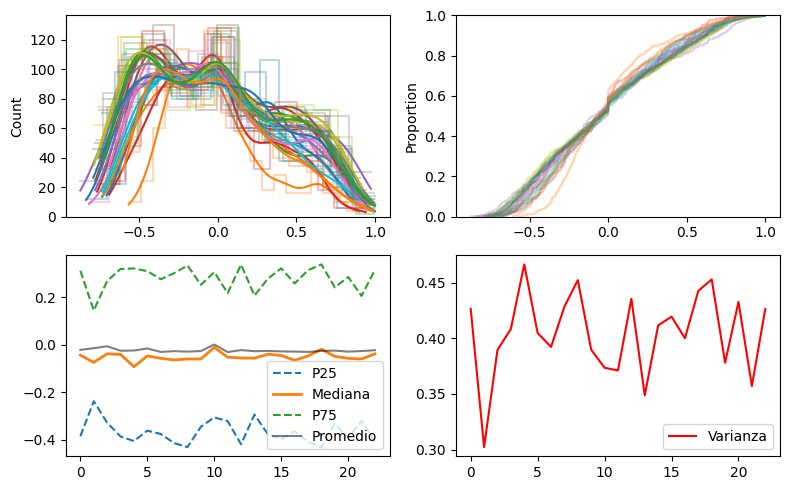

In [7]:

print ("Estadísticas para los observadores")
fig, axes = plt.subplots(2, 2, figsize=(8, 5)) 
t25_ob, t50_ob, t75_ob, prom_ob, var_ob=mm.estadisticas(lista_dfs_observadores, axes)
plt.tight_layout() 
plt.show()

In [8]:
mm.crear_tabla_resumen(t25_ob, t50_ob, t75_ob, prom_ob, var_ob)

,t25,t50,t75,promedio,varianza
min,-0.430147,-0.092021,0.144596,-0.030506,0.302253
max,-0.237012,-0.010505,0.338162,0.001356,0.466432
media,-0.366266,-0.050671,0.280886,-0.023199,0.404828
perc30,-0.399579,-0.057965,0.264206,-0.027222,0.389664
mediana,-0.375572,-0.052045,0.301103,-0.025619,0.408418


Text(0.5, 1.0, 'umbral=0.2, 0.3, 0.5, y 0.6, población>60%')

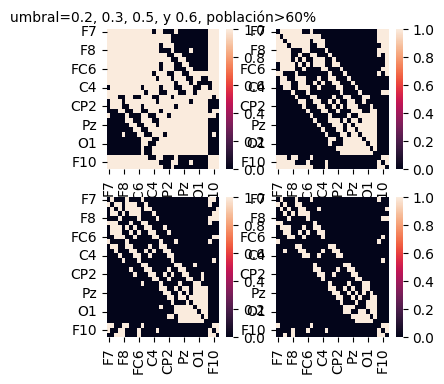

In [9]:
##### Explorar distintos umbrales
resultados1=mm.capsula(lista_dfs_observadores, -0.3, 0.6)
resultados2=mm.capsula(lista_dfs_observadores, 0.1, 0.6)
resultados3=mm.capsula(lista_dfs_observadores, 0.28, 0.6)#Umbral elegido débido a la conección occipital y frontal
resultados4=mm.capsula(lista_dfs_observadores, 0.4, 0.6)

fig,axes= plt.subplots(2,2, figsize=(4,4))
sns.heatmap(resultados1, ax=axes [0,0])
sns.heatmap(resultados2, ax=axes [0,1])
sns.heatmap(resultados3, ax=axes [1,0])
sns.heatmap(resultados4, ax=axes [1,1])
axes[0,0].set_title("umbral=0.2, 0.3, 0.5, y 0.6, población>60%", fontsize=10)
###

Grafo de los observadores a 0.28, cumplido por el 60% de la población


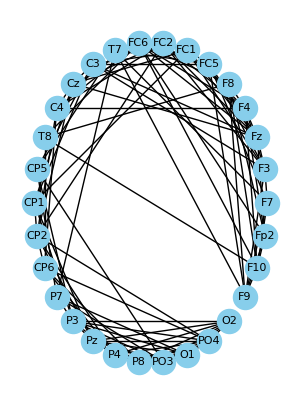

In [10]:
grafo_observador=nx.from_pandas_adjacency (resultados3)
fig= plt.figure(figsize=(8,5))
axes=[fig.add_subplot(1,2,1)]
print("Grafo de los observadores a 0.28, cumplido por el 60% de la población")
mm.dibujar_grafo(grafo_observador, axes[0])

In [11]:
mm.metricas(grafo_observador)
clust, path_length, small_world_sigma, communities, modularity, betwenness, global_eff, local_eff, degree_dict= mm.metricas(grafo_observador)
datos = {
    "Clustering Coeff": [clust],
    "Longitud Camino": [path_length],
    "Small World (Sigma)": [ small_world_sigma],
    "Modularidad": [modularity],
    "Eficiencia Global": [global_eff],
    "Eficiencia Local": [local_eff],
    "Num. Comunidades": [len(communities)],
    "Hub Principal": [betwenness[0][0]]  }   

df_metricas = pd.DataFrame(datos)
df_metricas

metricas de grafo
metricas de grafo


,Clustering Coeff,Longitud Camino,Small World (Sigma),Modularidad,Eficiencia Global,Eficiencia Local,Num. Comunidades,Hub Principal
0,0.556984,2.308046,1.598671,0.377714,0.540881,0.73045,3,CP2


In [12]:
mm. tabla_de_grados (degree_dict)  


,0
Media de grados,7.066667
Grado_máximo,9
Grado_mínimo,4
Nodos con mayor grado,"{'Fz': 9, 'F4': 9, 'P3': 9, 'P4': 9, 'PO3': 9}"


In [13]:
##Medidas de centralidad
mm.medidas_de_centralidad (grafo_observador)

,Grado,Centralidad_de_Grado,Cercania,Intermediacion
F7,5,0.172414,0.408451,0.015282
F3,8,0.275862,0.453125,0.040460
Fz,9,0.310345,0.467742,0.052912
F4,9,0.310345,0.453125,0.050917
F8,6,0.206897,0.408451,0.013742
FC5,7,0.241379,0.426471,0.032001
FC1,8,0.275862,0.483333,0.047983
FC2,8,0.275862,0.491525,0.063520
FC6,8,0.275862,0.432836,0.039293
T7,5,0.172414,0.414286,0.090448


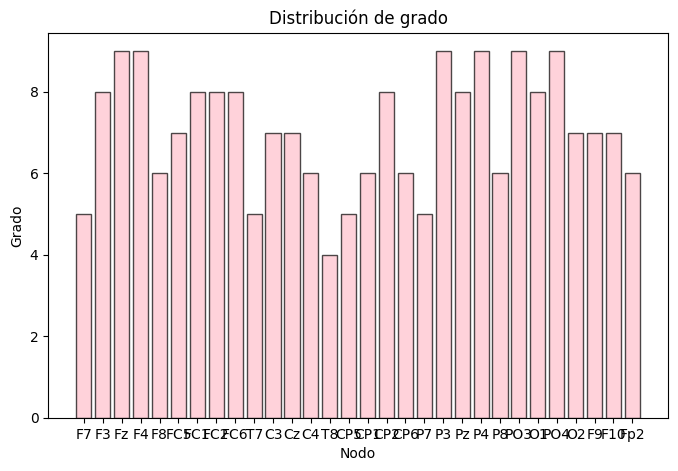

In [14]:
##Plot de grados
mm.distribución_de_grados (degree_dict)

In [15]:
#¿siguen ley potencia?
mm.ley_potencia (degree_dict)

xmin progress: 80%
--- RESULTADOS ESTADÍSTICOS ---
Alpha calculado: 9.4104
Xmin (corte): 8.0


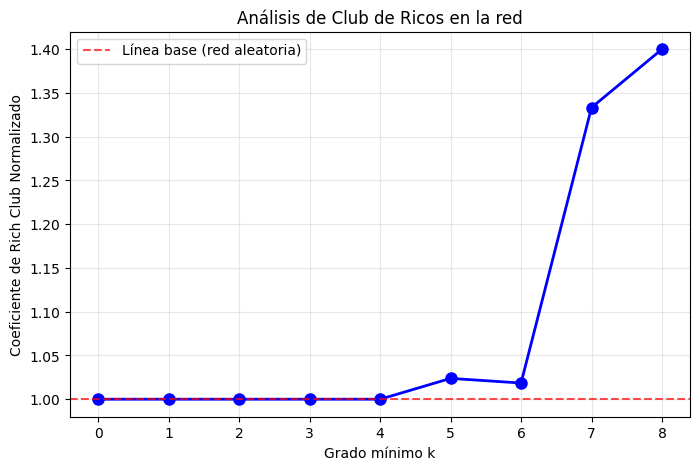

In [16]:
mm.club_de_ricos(grafo_observador)

In [17]:
##Coordenadas con sistema estandar
montage = mne.channels.make_standard_montage('standard_1020')
def obtener_canales_limpios(mat_content, key_type='observer'):
    struct = mat_content[key_type][0, 0]
    raw_clab = struct['clab']
    lista_canales = [str(item[0]) for item in raw_clab.flatten()]
    return lista_canales
pos_3d = montage.get_positions()['ch_pos']
canales=obtener_canales_limpios(first_file_content, key_type='observer') ## canales
pos_coordenadas = {}
for canal in canales:
        match = next((k for k in pos_3d.keys() if k.upper() == canal.upper()), None)
        if match:
            pos_coordenadas[canal] = pos_3d[match][:3]
c=pd.DataFrame.from_dict(pos_coordenadas, orient='index')
columnas = ['x', 'y', 'z']
c.columns=columnas
c = c.apply(pd.to_numeric, errors='coerce')

hub por intermediación CP2


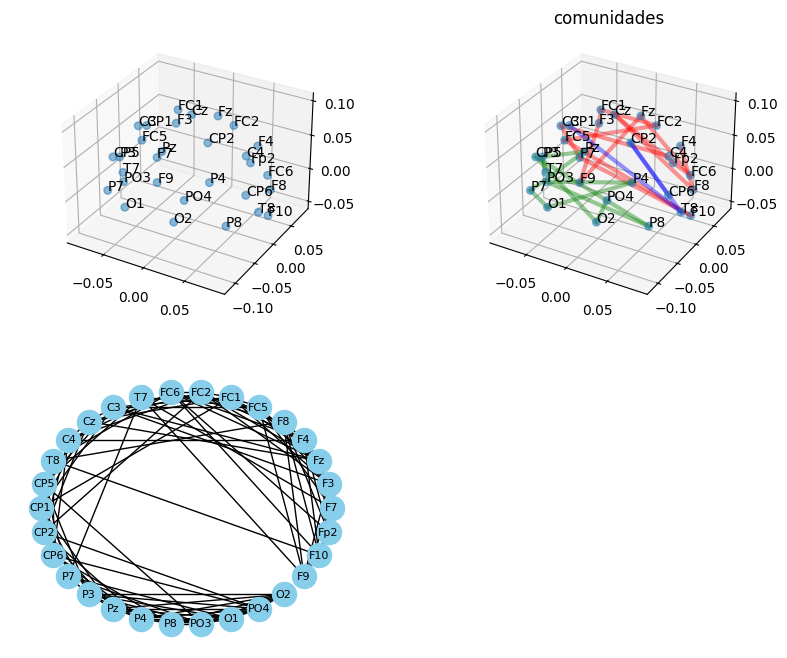

In [18]:
##Grafo 3d
hub= betwenness[0][0]
print(f"hub por intermediación {hub}")
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hub, c, axes[0])
mm.grafo_de_comunidades(communities, hub, c, axes[1])
mm.dibujar_grafo(grafo_observador, axes[2])
##3 comunidades, 1 frontal, otra medial y otra posterior

hubs_por_grado ['Fz', 'F4', 'P3']


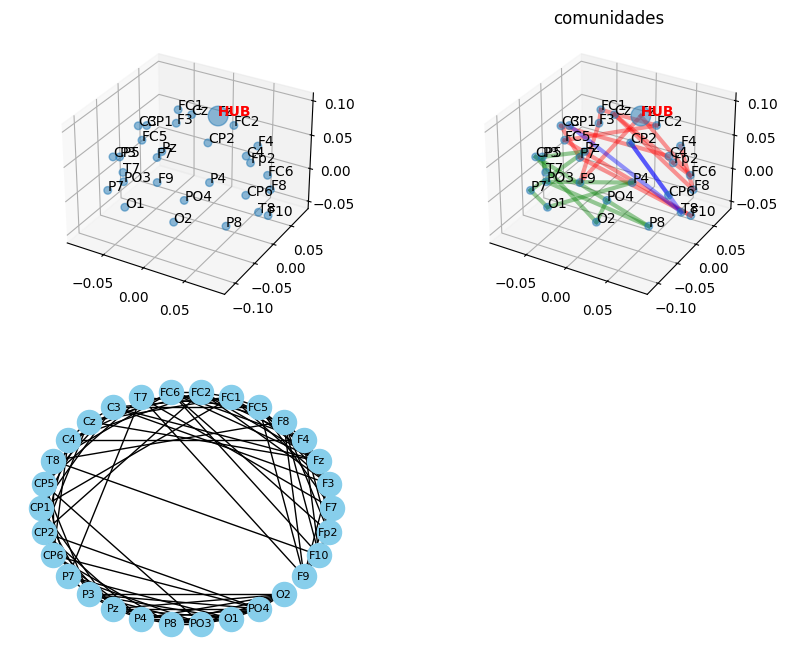

In [19]:
##Grafo 3d con hub por grado:
top_hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
hubs_por_grado = [hub[0] for hub in top_hubs]
print (f"hubs_por_grado {hubs_por_grado}")
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hubs_por_grado, c, axes[0])
mm.grafo_de_comunidades(communities, hubs_por_grado, c, axes[1])
mm.dibujar_grafo(grafo_observador, axes[2])

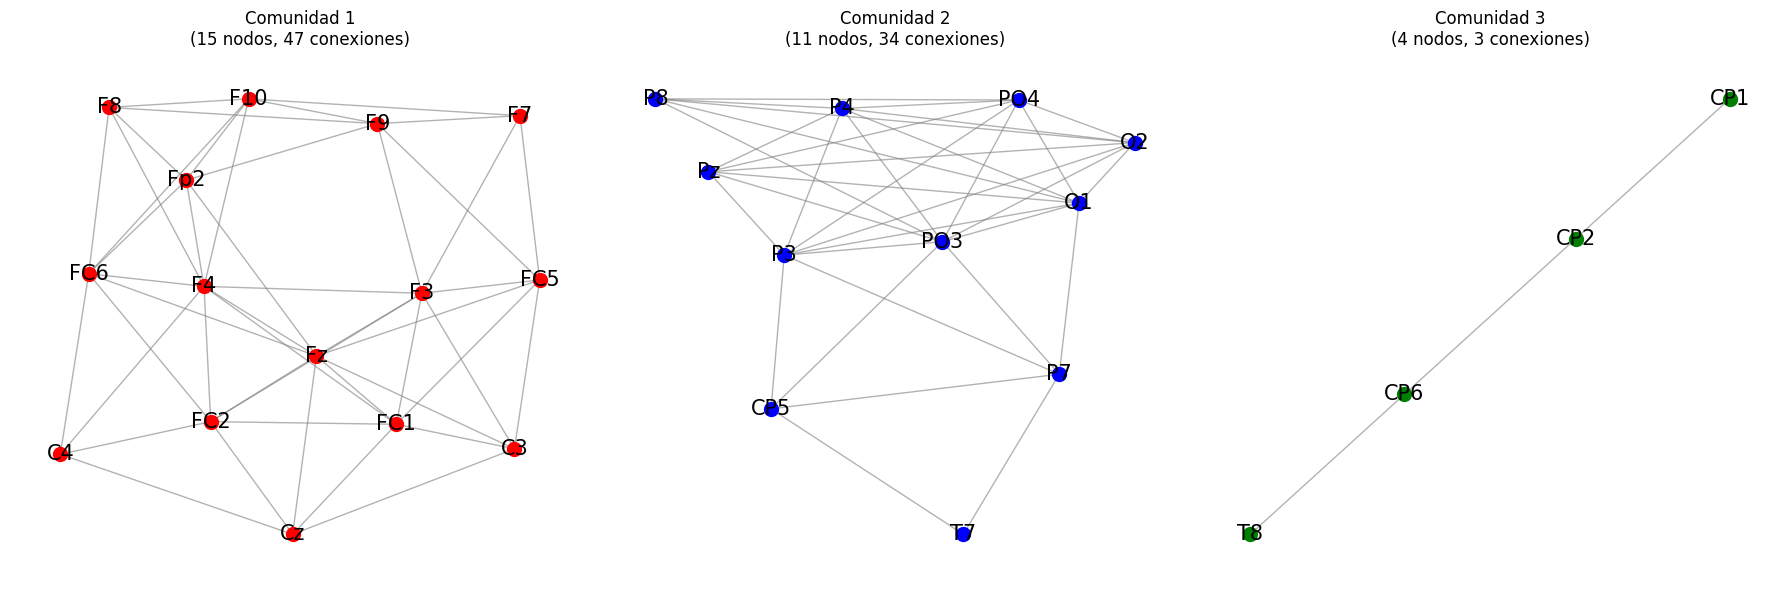

In [20]:
##subgrafos de comunidades
mm.grafos_comunidades (grafo_observador, communities)